# Part-1-Predicting Neighborhood Gentrification in London Using Machine Learning and Spatial Data
## Data Downloading & Processing
### Zoe Papagianni(01827902)                                                    9/06/2023


**Please ensure that you only run this notebook once.**

# Introduction
The purpose of the analysis is to investigate gentrification of certain areas in London and ultimately explore the potential of using machine learning techniques to predict areas that are likely to undergo gentrification in the future.

**Gentrification** is the process of urban transformation characterized by the influx of wealthier residents into previously disadvantaged neighborhoods. It has garnered significant attention from researchers as it brings about changes in the socioeconomic structure, housing market, and cultural dynamics of a neighborhood. Understanding and predicting gentrification can provide valuable insights for  urban planning, housing policy, and community development.


# Research question
The aim of this analysis is to examine the potential for predicting gentrified areas in London by utilizing data mainly from the 2011 and 2021 Censuses. The goal is to determine if a model can be created using multiple variables from the 2011 Census to accurately predict future areas that are more likely to undergo gentrification in 2021 based on specific gentrification scores. In order to shed light on potential gentrification patterns in the future, it will also be investigated whether it is feasible to use the same model to forecast outcomes in 2031 using data from the 2021 Census. The initial research questions are:
- During the study period, where can we find gentrified areas in metropolitan London?
- What are the variables we can use to quantify gentrification? Which variables play the most significant role in the gentrification process?
- Which method best captures the spatial properties of the data? What approach yields the most accurate representation of spatial relationships in the data?

# Dataset 
The analysis relies on data mainly obtained from the 2011 and 2021 Censuses.This data offers a wealth of information about various demographic, socioeconomic, and housing aspects at the LSOA level. The LSOA is a geographical unit that provides a detailed representation of the population and housing characteristics within smaller areas. By using these datasets, we aim to find patterns and detect changes over a 10 year period, enabling us to identify potential gentrification hotspots and understand the factors contributing to these transformations.
In later stages of the analysis,the incorporation of additional datasets will be considered. These data sources may include information such as crime rates, rental prices obtained from listing websites, and data on planning permissions and more. However, the inclusion of these datasets will depend on their availability and compatibility with the LSOA level of analysis, as well as their temporal coverage extending back to 2011. By integrating these relevant data sources, we aim to capture a more comprehensive picture of the factors possibly influencing gentrification and improve the accuracy of our predictive model.


# Methodology
To address the research question regarding gentrification in London, a predictive model will be used in the later stages of the analysis. Initially, the focus will be on data preparation, processing, analysis, and visualization of various variables describing demographics, housing, and employment. These variables include population density, income levels, qualifications, occupation, housing prices, tenure etc. Drawing upon the definition of gentrification, we could quantify its occurrence by measuring the change in different indicators such as the increase in housing values, rental prices, household income, and the presence of higher-educated individuals, professionals, or creative industries within an area. 

## Structure
The analysis will be initially structured as follows. This will be revised as the research idea is finalised:

1. Download and prepare the shapefiles: In this step, the shapefiles containing geographical data for London are obtained and preprocessed, including information on Boroughs, Wards, Output Areas (OAs), Middle Layer Super Output Areas (MSOAs), and Lower Layer Super Output Areas (LSOAs). This will provide the necessary geographic boundaries for our analysis.
2. Download and prepare datasets from 2011 and 2021: In this step, the datasets corresponding to the years 2011 and 2021 are acquired and preprocessed . It is crucial to ensure that the data from both years are aligned in terms of number of variables and names and the units of measurement. This will involve cleaning, formatting, and matching the datasets to facilitate further analysis.
3. Explore and visualize: Once the data is prepared, an initial analysis will be conducted to gain a high-level understanding of the variables and their relationships. Visualizations will aid in comprehending the data and presenting key findings effectively.
4. Convert of 2011 LSOAs to 2021 LSOAs: To facilitate comparative analysis between the two time periods, we will convert the 2011 LSOAs to match the LSOA boundaries of 2021.
5. Data analysis and processing: To handle the complexity of the dataset and reduce dimensionality, appropriate techniques such as feature selection or dimensionality reduction methods will be employed. This step aims to identify the most informative and relevant features that contribute to the prediction of gentrification.
6. Predictive modeling approach: Using the processed and reduced dataset,predictive modeling techniques will be applied to develop a model that can predict gentrification outcomes. This will involve training the model on the reduced 2011 data and evaluating its performance using appropriate metrics. The model will then be applied to the 2021 data for future predictions.

In this milestone, we will focus on completing steps 1 and 2 of the analysis. The exploration stage will be conducted at a high level to gain initial insights. The data preparation process has been particularly challenging and will be described in detail below. The notebook "00-Data Cleaning and Processing" will cover steps 1 and 2, while the notebook "01-Data Exploration" will cover step 3.


### 1. Preparing Shapefiles

The first stage includes downloading and preparing the shapefiles containing the data for London geography. The majority of open data related to specific locations is typically published using certain standardized geographical areas. These areas, such as Output Areas (OAs) and Super Output Areas, were primarily designed for Census data publication and are relatively consistent in terms of population size. The most commonly used geographical levels for data publication include:
- Output Areas (OAs): These are the smallest geographical areas for data publication, with an average population of approximately 310 residents. While not many datasets are available at this level, it is commonly used for Census outputs.
- Lower Layer Super Output Areas (LSOAs): LSOAs have an average population of 1500 people or 650 households. A significant amount of data is available directly at the LSOA level, including the majority of the data found in tools like Local Insight.
- Middle Layer Super Output Areas (MSOAs): MSOAs have an average population of 7500 residents or 4000 households. Some datasets are published at the MSOA level, which is the smallest geographical level for certain datasets.
- Ward: They refer to a specific local authority area primarily used for electoral purposes. However, ward-level data is often not published directly for a couple of reasons. Firstly, ward boundaries tend to change frequently, resulting in a lack of consistency over time. Secondly, wards can vary significantly in size, making it challenging to compare data across different areas.Due to these factors,we utilize other geographical units, such as the above which are more stable and standardized.

From 2011 to 2021, these areas underwent some changes as part of the creation of New 2021 LSOAs. This involved merging or splitting existing 2011 LSOAs to ensure that population and household thresholds were met. The outputs from the Census 2021 are based on the 2021 LSOAs, which consist of both unchanged 2011 LSOAs and newly created 2021 LSOAs. In England, there are 33,755 LSOAs, while in Wales, there are 1,917 LSOAs. 

The below [image](https://ocsi.uk/2019/03/18/lsoas-leps-and-lookups-a-beginners-guide-to-statistical-geographies/) shows the difference between the geographies.

![title](images/OA-LSOA-MSOA.png).

### 2. Downloading and preparing datasets from 2011 and 2021
The second stage of the analysis focuses on acquiring and downloading the census data, which provides valuable information about the population and households in England and Wales. The data files in CSV format can be accessed and downloaded from the [Nomis](https://www.nomisweb.co.uk/) website, and they are stored in the data/predictors folder for further processing. There were varius challenges that needed to be taken into account at this stage as dealing with governmental datasets poses certain difficulties. Firstly, the time span between the two census periods (2011 and 2021) is quite substantial, and it may not fully capture recent changes in the population and socio-economic characteristics. Secondly the specific instructions for locating and downloading the Census data from the Nomis website varies and as a result the data need to be downloaded and saved manually. Additionally, inconsistencies in the naming of variables may exist, and some variables might be missing or split into multiple variables across different census years. This necessitates careful manual checking and alignment of variables to ensure accurate analysis. Moreover, it is important to note that certain variables are available at the Lower Layer Super Output Area (LSOA) level in 2011 but only at the Middle Layer Super Output Area (MSOA) level in 2021. Furthermore, the Office for National Statistics (ONS) mentions that some questions in the census were revised and split up in the 2021 Census compared to the 2011 Census. This means that direct comparisons of people's responses between the two census years may not be entirely feasible. These changes should be considered when exploring and interpreting the data. Due to the challenges mentioned above and the limited available time, only a subset of variables deemed more relevant will be processed and explored in this stage. But it's important to acknowledge these challenges  when interpreting the findings and deriving insights into the gentrification dynamics in London.


# 1. Preparing Shapefiles 
## Data Sources
The data used for the shapefiles, can be found in the [London Datastore](https://data.london.gov.uk/). More specifically: 
- [London Boundaries](https://hub.arcgis.com/datasets/58247b4f427443d381d7d82e3a7565e1_0/explore
): This resource provides digital vector boundaries for regions in England as of December 2016, sourced from the Office for National Statistics (ONS) . The folder includes shapefiles for Output Areas (OA) 2011, Lower Super Output Areas (LSOA) 2004 and 2011, Middle Super Output Areas (MSOA) 2004 and 2011, and London Wards (separate files for City of London merged into a single area and split into separate wards). There are separate download files available for 2014 and 2018 boundaries.
- [London Boroughs, Wards, LSOAs](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london): This folder contains a variety of key GIS boundary files for ESRI and Map Info, covering Greater London.
- [LSOAs weights for 2011](https://hub.arcgis.com/datasets/ons::lsoa-dec-2011-boundaries-generalised-clipped-bgc-ew-v3-2/explore?location=52.883603%2C-2.860546%2C7.14): The GLA LSOA data is not suitable for calculating the weights matrix, so data from the Office for National Statistics (ONS) is used instead. This file contains the digital vector boundaries for Lower Layer Super Output Areas as of December 31, 2011, in England and Wales.
- [Output Areas for 2021](https://geoportal.statistics.gov.uk/datasets/ons::output-areas-2021-ew-bfe/explore): This dataset contains the Output Areas (OAs) as of 2021 in England and Wales..
- [LSOAs 2011 to 2021](https://geoportal.statistics.gov.uk/datasets/ons::lsoa-2011-to-lsoa-2021-to-local-authority-district-2022-lookup-for-england-and-wales-version-2-1/about): This is a best-fit lookup file between Lower Layer Super Output Areas (LSOA) as of December 2011 and LSOAs as of December 2021 in England and Wales. The lookup includes all 2011 LSOAs (34,753), which are matched to the 2021 LSOA boundaries (34,628 records, with 1,044 LSOAs missing from the 2021 LSOAs).
- [Output Area to Lower layer Super Output Area 2021](https://geoportal.statistics.gov.uk/datasets/output-area-to-lower-layer-super-output-area-to-middle-layer-super-output-area-to-local-authority-district-december-2021-lookup-in-england-and-wales-v2-1/about): This is a lookup table that provides the relationship between Output Areas (OA), Lower Layer Super Output Areas (LSOA), Middle Layer Super Output Areas (MSOA), and Local Authority Districts (LAD) as of December 31, 2021, in England and Wales.

The data can be found in the `data/zip` folder and are automatically extracted when running the code.

## Load libraries

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import contextily as ctx

# For reproducibility
import random
import numpy as np
import warnings
from pysal.lib import weights
warnings.filterwarnings("ignore")

# Define random state to reproduce
r_state = 58
random.seed(r_state)
np.random.seed(r_state)

import pandas as pd
import pysal as ps
import geopandas as gpd
import glob
import re
import os
import io
import zipfile
from scipy.stats import gmean
import shutil

from io import BytesIO

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Li

In [22]:
# Create folders path
lkp = os.path.join('data', 'lkp')
shp = os.path.join('data', 'shp')
src = os.path.join('data','src')

In [23]:
# Reset and Delete old folders
if os.path.exists(lkp):
    shutil.rmtree(lkp)
if os.path.exists(shp):
    shutil.rmtree(shp)
if os.path.exists(src):
    shutil.rmtree(src)
print("Done.")

Done.


In [24]:
# Specify input data path data/input/zip
zip = os.path.join('data','input', 'zip')

# Create folders
for d in [lkp, shp,src]:
    if not os.path.exists(d):
        os.makedirs(d)

# Create temporary folder to extract zip files
shpt = os.path.join(shp, 'temp')
if not os.path.exists(shpt):
    os.makedirs(shpt)

In [25]:
# Define boroughs
boroughs = ['City of London','Barking and Dagenham','Barnet','Bexley','Brent','Bromley',
            'Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham',
            'Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington',
            'Kensington and Chelsea','Kingston upon Thames','Lambeth','Lewisham',
            'Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton',
            'Tower Hamlets','Waltham Forest','Wandsworth','Westminster']

# Create a dictionary of borough names in 2018 and their corresponding 2011 names
borough_rename = {
    'City of Westminster': 'Westminster',
    'City and County of the City of London': 'City of London'}

In [26]:
# Extract zip files
# Iterate over each file in the folder
if len(os.listdir(shpt)) == 0:
    for file_name in os.listdir(zip):
        if file_name.endswith('.zip'):  # Check if the file is a zip file
            file_path = os.path.join(zip, file_name)  # Full path of the zip file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(shpt)
    print("Done.")
else:
    print("The folder already contains the extracted files .")

Done.


### Create Shapefiles

This part focuses on creating shapefiles for different geographical regions in London, which are essential for the rest of the analysis. All the shapefiles created from 2011 and 2021 can be found in the `shp` folder. The `lkp` contains the mappings from LSOAs to OAs and Wards for later stages.

### Extract London Boundaries

The first section of the code deals with processing the "Regions" shapefile. The script reads the shapefile, selects the region corresponding to London, and saves it as a separate shapefile. The shapefile is then plotted on a map with a basemap.

In [27]:
# Use glob to find .shp files in the folder
regions = glob.glob(shpt + '/Regions*.shp')[0]
print("Processing: " + regions)

# Read the shapefile into a GeoDataFrame
regions = gpd.read_file(regions)

# Select the region for London
london = regions[regions.rgn16nm=='London']

# Reset the index of the GeoDataFrame
london.reset_index(inplace=True, drop=True)

# Save the London shapefile
london.to_file(os.path.join(shp,'London.shp'))
print("Done.")


Processing: data/shp/temp/Regions_December_2016_FEB_in_England.shp
Done.


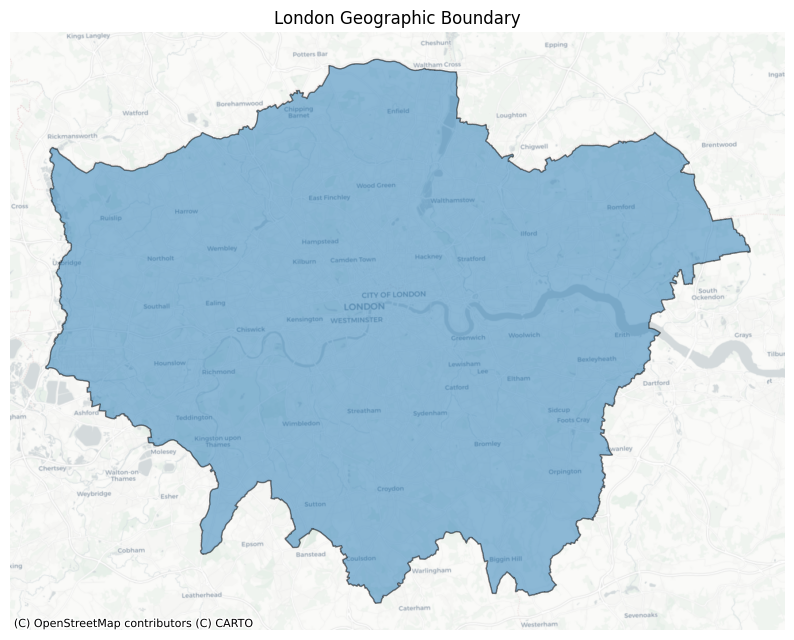

In [126]:
# Plot the London shapefile
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the London shapefile
london.plot(ax=ax, alpha=0.5,edgecolor='k')
#Plot basemap
ctx.add_basemap(ax, crs=london.crs.to_string(),source=ctx.providers.CartoDB.Positron)
plt.axis('off')
# Add a title and show the plot
plt.title('London Geographic Boundary')
plt.show()

### Extract Boroughs

Next, the script processes the "Boroughs" shapefile. It reads the shapefile, selects the boroughs specified in the project, and saves them as a separate shapefile. The shapefile is also plotted on a map with a basemap.


In [28]:
# Use glob to find the Borough shapefile in the specified directory
counties = glob.glob(os.path.join(shpt, 'statistical-gis-boundaries-london', 'ESRI', '*Borough*.shp'))[0]
print("Processing: " + counties)

# Read the shapefile into a GeoDataFrame
brh = gpd.read_file(counties)

# Choose London boroughs by filtering the GeoDataFrame based on the 'NAME' column
brh = brh.loc[brh.NAME.isin(boroughs)].reset_index(drop=True)

# Set the coordinate reference system (CRS) of the GeoDataFrame
brh.crs = {'init': u'epsg:27700'}

# Save the borough shapefile
print("\tSaving to shapefile...")
brh.to_file(os.path.join(shp, 'Boroughs.shp'))

print("Done.")


Processing: data/shp/temp/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp
	Saving to shapefile...
Done.


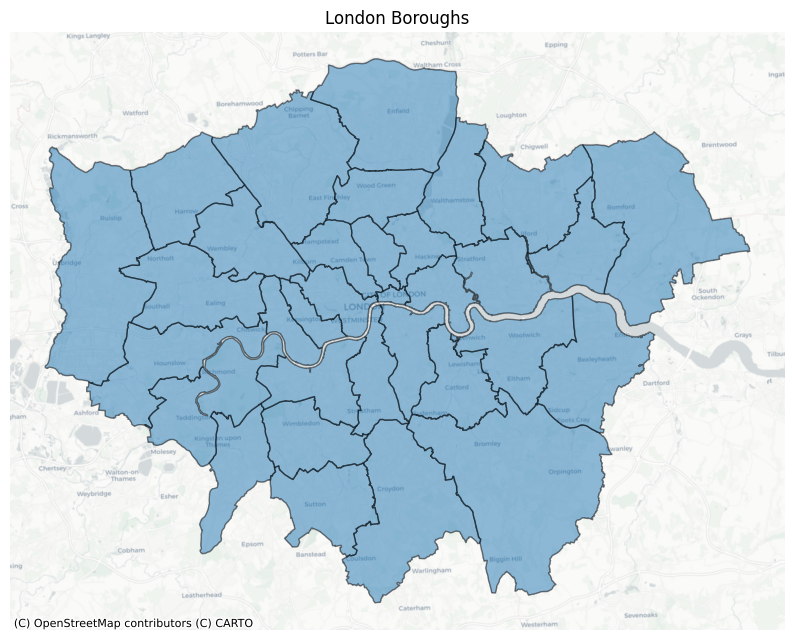

In [128]:
# Plot the London shapefile
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the London shapefile
brh.plot(ax=ax, alpha=0.5, edgecolor='k')
#Plot basemap
ctx.add_basemap(ax, crs=london.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.axis('off')
# Add a title and show the plot
plt.title('London Boroughs')
plt.show()

### Processing and preparing 2011 geographic data
In this section the geographic data is processed. First, the LSOAs (Lower Layer Super Output Area) shapefiles for 2011 are loaded to extract the information from 2011 and save the shapefiles and related data as separate files. 

The script also processes the "Wards 2011" shapefile by reading it, setting the projection, and saving it as a separate shapefile. Next, a mapping between LSOAs and Wards is created by joining the LSOA and Ward shapefiles based on their spatial relationship. The resulting data is saved as a CSV file and will be used for visualisation purposes in the next step. The code then processes the Output Areas (OAs) for 2011 by reading the shapefile, setting the projection, saving it as a separate shapefile, and creating a mapping between LSOAs and OAs, which is saved as a CSV file.

#### Selecting LSOAs for 2011
The LSOA 2011 data is also saved as a pickle file (lsoa_g2021.to_pickle()) as it is useful for storing GeoDataFrames in a serialized format that preserves its structure and data. It also provides the advantage of faster access and analysis compared to reading from the original shapefile.

In [29]:
lsoas = glob.glob(os.path.join(shpt, 'statistical-gis-boundaries-london', 'ESRI', '*LSOA*.shp'))

for l in lsoas:
    print("Processing: " + l)
    lsoa_y = gpd.read_file(l)

    # Extract the year as 4 digits
    m = re.search(r'\d{4}', l)
    lyear = l[m.start():m.end()]

    # Check if the year is 2011
    if lyear=='2011':
        # Set projection
        lsoa_y.crs = {'init': 'epsg:27700'}

        # Common name
        lsoa_y.insert(0, 'lsoacd',
                      lsoa_y[[x for x in lsoa_y.columns if 'LSOA' in x and ('CD' in x or 'CODE' in x)][0]])

        print("\tSaving to shapefile...")
        lsoa_y.to_file(os.path.join(shp, 'LSOAs ' + str(lyear) + '.shp'))

        print("\tSaving to pickle...")
        lsoa_y.to_pickle(os.path.join(lkp, 'LSOAs ' + str(lyear) + '.pkl'))


print("Done.")


Processing: data/shp/temp/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp
	Saving to shapefile...
	Saving to pickle...
Processing: data/shp/temp/statistical-gis-boundaries-london/ESRI/LSOA_2004_London_Low_Resolution.shp
Done.


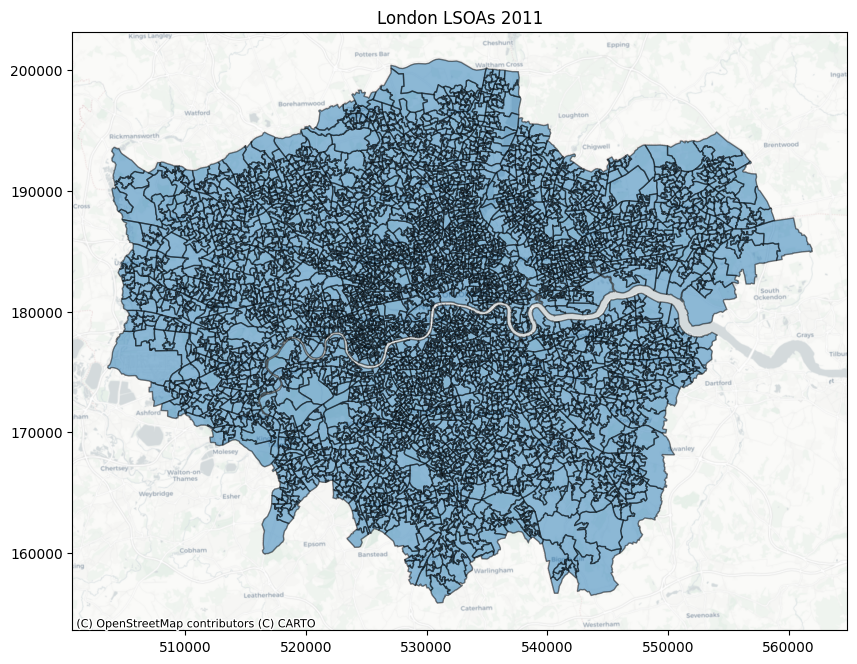

In [130]:
# Plot the London shapefile
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the London shapefile
lsoa_y.plot(ax=ax, alpha=0.5,edgecolor='k')
#Plot basemap
ctx.add_basemap(ax, crs=london.crs.to_string(),source=ctx.providers.CartoDB.Positron )
# Add a title and show the plot
plt.title('London LSOAs 2011')
plt.show()

#### Dealing with LSOA data issue

The above LSOA data from the GLA doesn't work for calculating the weights matrix. The result I get is:
```[shell]
Mean neighbours: 0.0
	Max neighbours:  0
	Min neighbours:  0
	No. Islands:     4835
```

Spatial weights capture the spatial relationships between neighboring areas. In this case, the Queen contiguity criterion defines neighboring areas as those sharing at least one vertex or one side. The resulting spatial weights matrix assigns weights to each pair of neighboring LSOAs, indicating their spatial proximity. These weights are particularly useful in a later stage of the analysis when dealing with missing values for some LSOAs. They can help replace missing values based on the values of neighboring areas, taking into account the spatial relationships among LSOAs. The data is extracted from the ONS website and saved in the `shp` folder.


In [30]:
lsoag = glob.glob(os.path.join(shpt, '*LSOA_2011*.shp'))[0]  # LSOAs Generalised

print("Processing: " + lsoag)
lsoa_g = gpd.read_file(lsoag)

lsoa_g['borough'] = lsoa_g.LSOA11NM.str.extract("^(.+?) [0-9A-Z]{4}")  #  Extract borough/council names for subsetting
lsoa_g = lsoa_g[lsoa_g.borough.isin(boroughs)]  # And select only those boroughs that match the array create above
print("\tExtracted " + str(len(lsoa_g)) + " London LSOAs.")

print("\tSaving to shapefile...")
lsoa_g.to_file(os.path.join(shp, 'LSOA-2011-Weights.shp'))

w = weights.Queen.from_shapefile(os.path.join(shp, 'LSOA-2011-Weights.shp'))
print("Check results:")
print("\tMean neighbours: " + str(w.mean_neighbors))
print("\tMax neighbours:  " + str(w.max_neighbors))
print("\tMin neighbours:  " + str(w.min_neighbors))
print("\tNo. Islands:     " + str(len(w.islands)))

Processing: data/shp/temp/LSOA_2011_EW_BGC_V3.shp
	Extracted 4835 London LSOAs.
	Saving to shapefile...
Check results:
	Mean neighbours: 5.913547052740435
	Max neighbours:  15
	Min neighbours:  1
	No. Islands:     0


#### Selecting and Joining Wards for 2011

In [31]:
wards2011 = glob.glob(os.path.join(shpt, 'statistical-gis-boundaries-london', 'ESRI', '*Ward*Merged.shp'))[0]

print("Processing wards...")
ward_geo2011 = gpd.read_file(wards2011)
ward_geo2011.crs = {'init': 'epsg:27700'}

print("\tSaving to shapefile...")
ward_geo2011.to_file(os.path.join(shp, 'Wards 2011.shp'))

Processing wards...
	Saving to shapefile...


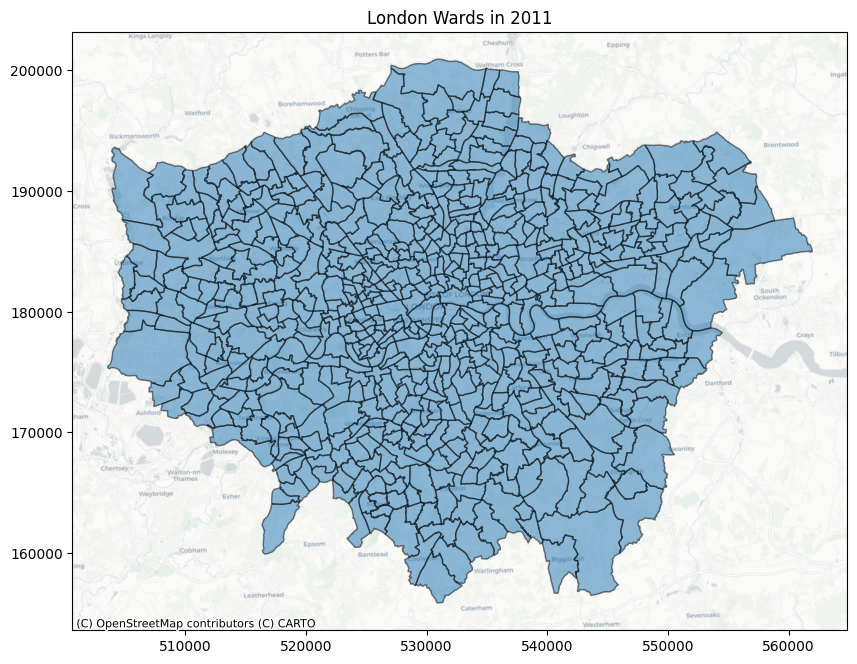

In [133]:
# Plot the London shapefile
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the London shapefile
ward_geo2011.plot(ax=ax, alpha=0.5, edgecolor='k')
#Plot basemap
ctx.add_basemap(ax, crs=london.crs.to_string(),source=ctx.providers.CartoDB.Positron )
# Add a title and show the plot
plt.title('London Wards in 2011')
plt.show()

#### Create a mapping for LSOAs 2011 to Wards 2011

In [32]:
# Read the LSOAs 2011 shapefile into a GeoDataFrame
print("Processing LSOAs...")
lsoa2011 = gpd.read_file(os.path.join(shp,'LSOAs 2011.shp'))

# Set the coordinate reference system (CRS) of the GeoDataFrame
lsoa2011.crs = {'init':'epsg:27700'}

# Create a copy of the LSOAs 2011 GeoDataFrame
lsoa_c2011 = lsoa2011

# Convert the geometry of the LSOAs to their centroids
lsoa_c2011.geometry = lsoa_c2011.centroid

# Save the LSOAs 2011 centroids as a new shapefile
lsoa_c2011.to_file(os.path.join(shp,'LSOAs 2011 Points.shp'))

print("\tJoining Wards to LSOAs...")

# Perform a spatial join between the LSOAs 2011 centroids and the ward_geo2011 GeoDataFrame
t_2011 = gpd.sjoin(lsoa_c2011, ward_geo2011, how='left')

# Rename columns in the resulting joined GeoDataFrame
t_2011.rename(columns={
    'GSS_CODE':'gss_cd',
    'LB_GSS_CD':'lb_gss_cd'
}, inplace=True)

# Save the relevant columns from the joined GeoDataFrame to a CSV file
t_2011[['lsoacd','gss_cd','lb_gss_cd']].to_csv(os.path.join(lkp,'LSOA_WARD_2011_JR.csv'), index=False)

print("Done.")


Processing LSOAs...
	Joining Wards to LSOAs...
Done.


#### Selecting and Joining Output Areas for 2011

In [135]:
# Load the OAs 2011 path
oas_2011 = glob.glob(os.path.join(shpt, 'statistical-gis-boundaries-london', 'ESRI', 'OA_*.shp'))[0]

# Read the OAs 2011 shapefile into a GeoDataFrame
print("Processing Output Areas...")
oa_geo_2011 = gpd.read_file(oas_2011)
oa_geo_2011.crs = {'init': 'epsg:27700'}

# Save the OAs 2011 centroids as a new shapefile
print("\tSaving to shapefile...")
oa_geo_2011.to_file(os.path.join(shp, 'OAs 2011.shp'))

# Create a copy of the OAs 2011 GeoDataFrame
oa_c_2011 = oa_geo_2011
# Convert the geometry of the OAs to their centroids
oa_c_2011.geometry = oa_c_2011.centroid

# Save the OAs 2011 centroids as a new shapefile
print("\tSaving point OAs...")
oa_c_2011.to_file(os.path.join(shp, 'OAs 2011 Points.shp'))

print("\tOutput Areas to OAs...")

# Rename columns in the resulting joined GeoDataFrame
oa_geo_2011.rename(columns={
    'LSOA11CD': 'lsoacd',
    'OA11CD': 'oacd'
}, inplace=True)
# Save the relevant columns from the joined GeoDataFrame to a CSV file
oa_geo_2011[['lsoacd', 'oacd']].to_csv(os.path.join(lkp, 'LSOA_OA_2011_JR.csv'), index=False)

print("Done.")


Processing Output Areas...
	Saving to shapefile...
	Saving point OAs...
	Output Areas to OAs...
Done.


#### Local Authorities 2011

In [36]:
print("Processing: ")
la2011 = pd.read_csv(os.path.join(zip,'nlac-2011.csv'))

# Rename columns for consistency
la2011.rename(columns={
    'New LA Code': 'LAD11CD',
    'LA Name': 'LAD11NM'
}, inplace=True)

# And select only those boroughs that match the array create above
la2011 = la2011[la2011['LAD11NM'].isin(boroughs)]
la2011[['LAD11CD', 'LAD11NM']].to_csv(os.path.join(lkp, 'LOCAL_AUTHORITIES_2021.csv'), index=False)


Processing: 


### Processing and preparing 2021 geographic data
#### Selecting LSOAs for 2021

I repeat the same processing steps for the data from 2021.

In [39]:
# Use glob to find the LSOA 2021 shapefile
lsoag2021 = glob.glob(os.path.join(shpt, '*LSOA_2021*.shp'))[0]

print("Processing: " + lsoag2021)

# Read the LSOA 2021 shapefile into a GeoDataFrame
lsoa_g2021 = gpd.read_file(lsoag2021)

# Extract borough/council names from LSOA names for subsetting
lsoa_g2021['borough'] = lsoa_g2021.LSOA21NM.str.extract("^(.+?) [0-9A-Z]{4}")

# Select only those LSOAs that belong to the specified boroughs
lsoa_g2021 = lsoa_g2021[lsoa_g2021.borough.isin(boroughs)]

print("\tExtracted " + str(len(lsoa_g2021)) + " London LSOAs.")

print("\tSaving to shapefile...")
lsoa_g2021.to_file(os.path.join(shp, 'LSOA-2021-Weights.shp'))

# Generate spatial weights using Queen contiguity from the shapefile
w = weights.Queen.from_shapefile(os.path.join(shp, 'LSOA-2021-Weights.shp'))

print("Check these results against above information:")
print("\tMean neighbors: " + str(w.mean_neighbors))
print("\tMax neighbors:  " + str(w.max_neighbors))
print("\tMin neighbors:  " + str(w.min_neighbors))
print("\tNo. Islands:    " + str(len(w.islands)))

# Set the coordinate reference system (CRS) of the LSOA 2021 GeoDataFrame
lsoa_g2021.crs = {'init': 'epsg:27700'}

# Insert a new column with a common name for LSOAs
lsoa_g2021.insert(0, 'lsoacd',
                  lsoa_g2021[[x for x in lsoa_g2021.columns if 'LSOA' in x and ('CD' in x or 'CODE' in x)][0]])

print("\tSaving to shapefile...")
lsoa_g2021.to_file(os.path.join(shp, 'LSOAs 2021' + '.shp'))

print("\tSaving to pickle...")
lsoa_g2021.to_pickle(os.path.join(lkp, 'LSOAs 2021' + '.pkl'))


Processing: data/shp/temp/LSOA_2021_EW_BGC.shp
	Extracted 4994 London LSOAs.
	Saving to shapefile...
Check these results against above information:
	Mean neighbors: 5.9014817781337605
	Max neighbors:  20
	Min neighbors:  1
	No. Islands:    0
	Saving to shapefile...
	Saving to pickle...


#### Selecting and Joining Wards for 2021
We have utilized the ward shapefiles from 2018 instead of the 2021 shapefiles because the latter lack the necessary information regarding the gss_code, which is essential for the later steps of our analysis. Additionally, it is important to note that certain borough names have undergone changes between 2011 and 2021.

In [40]:
wards2018 = glob.glob(os.path.join(shpt, 'London-wards-2018_ESRI', '*Ward*Merged.shp'))[0]

print("Processing wards...")
ward_geo2018 = gpd.read_file(wards2018)
ward_geo2018.crs = {'init': 'epsg:27700'}

# Rename the boroughs in the "DISTRICT" column
ward_geo2018['DISTRICT'] = ward_geo2018['DISTRICT'].replace(borough_rename)

print("\tSaving to shapefile...")
ward_geo2018.to_file(os.path.join(shp, 'Wards 2018.shp'))

Processing wards...
	Saving to shapefile...


#### Create a mapping for LSOAs 2021 to Wards 2021

In [41]:
# Create a mapping for LSOAs to Wards
lsoa2021 = gpd.read_file(os.path.join(shp, 'LSOAs 2021.shp'))
lsoa2021.crs = {'init': 'epsg:27700'}

lsoa_c2021 = lsoa2021
lsoa_c2021.geometry = lsoa_c2021.centroid
lsoa_c2021.to_file(os.path.join(shp, 'LSOAs 2021 Points.shp'))

print("\tJoining Wards to LSOAs...")
t = gpd.sjoin(lsoa_c2021, ward_geo2018, how='left')
t.rename(columns={
    'GSS_CODE': 'gss_cd',
    'LAGSSCODE': 'lb_gss_cd'
}, inplace=True)

t[['lsoacd', 'gss_cd', 'lb_gss_cd']].to_csv(os.path.join(lkp, 'LSOA_WARD_2021_JR.csv'), index=False)

print("Done.")

	Joining Wards to LSOAs...
Done.


#### Selecting and Joining Output Areas for 2021
Creating the 2021 Output Areas files involves a more complex process compared to 2011. Firstly,the CSV file that maps output areas to LSOA and the Output Areas shapefile contains data for the entire UK. To narrow down the data, we apply filters to keep only the relevant columns of interest.

In [43]:
print("\tOutput Areas to LSOAs...")
# Read the CSV file containing the mapping between Output Areas (OAs) and LSOAs
oas_loas_2021 = pd.read_csv(os.path.join(zip, 'OA21_LSOA21_MSOA21_LAD22_EW_LU.csv'))

# Filter the mapping data to include only the specified boroughs
oas_loas_2021 = oas_loas_2021[oas_loas_2021['lad22nm'].isin(boroughs)]

# Rename columns for consistency
oas_loas_2021.rename(columns={
    'lsoa21cd': 'lsoacd',
    'oa21cd': 'oacd'
}, inplace=True)

# Save the LSOA-OA mapping to a CSV file
oas_loas_2021[['lsoacd', 'oacd']].to_csv(os.path.join(lkp, 'LSOA_OA_JR_2021.csv'), index=False)

print("Done.")

# Find the shapefile for Output Areas (OAs) 2021
oas2021 = glob.glob(os.path.join(shpt, 'OA_2021_EW_BGC.shp'))[0]

print("Processing Output Areas...")
# Read the OA shapefile into a GeoDataFrame
oa_geo2021 = gpd.read_file(oas2021)

# Set the coordinate reference system (CRS) of the OA GeoDataFrame
oa_geo2021.crs = {'init': 'epsg:27700'}

# Merge the OA GeoDataFrame with the LSOA-OA mapping DataFrame
merged_df = pd.merge(oa_geo2021, oas_loas_2021, left_on='OA21CD', right_on='oacd', how='inner')

print("\tSaving to shapefile...")
# Save the merged GeoDataFrame to a shapefile
merged_df.to_file(os.path.join(shp, 'OAs 2021.shp'))

# Create a new GeoDataFrame with OA centroids
oa_c2021 = merged_df
oa_c2021.geometry = oa_c2021.centroid

print("\tSaving point OAs...")
# Save the OA centroids GeoDataFrame to a shapefile
oa_c2021.to_file(os.path.join(shp, 'OAs 2021 Points.shp'))


	Output Areas to LSOAs...
Done.
Processing Output Areas...
	Saving to shapefile...
	Saving point OAs...


## Local authorities

In [45]:
print("Processing: ")
la2021= pd.read_csv(os.path.join(zip,'LAD_DEC_2021_UK_NC.csv'))

# And select only those boroughs that match the array create above
la2021 = la2021[la2021['LAD21NM'].isin(boroughs)]
la2021[['LAD21CD', 'LAD21NM']].to_csv(os.path.join(lkp, 'LOCAL_AUTHORITIES_2021.csv'), index=False)

Processing: 


### Delete temp

In [140]:
shutil.rmtree(shpt)
print("Done.")

Done.


# Census Datasets
This part focuses on creating csv files for the variables found in Census Data for the years 2011 and 2021. As mentioned above, the CSV files containing the data can be accessed and downloaded from the [Nomis](https://www.nomisweb.co.uk/) website. During each step of the process, it is necessary to verify whether the column names for the years 2011 and 2021 correspond. If they don't match, the columns are renamed or aggregated accordingly. To access the CSV files for the 2011 census, I used the [table finder](https://www.nomisweb.co.uk/census/2011/data_finder) tool available on the Nomis website. For every dataset, we need to query the data by choosing the geography, the variables we need and format of the output. Then I chose to manually delete from the csv file the first rows containing the description but this could also be done programmatically using pd.read_csv.
For the 2021 census, Nomis provides a dedicated page called the [2021 Census Bulk Data Download](https://www.nomisweb.co.uk/sources/census_2021_bulk), where all the data from the 2021 Census dataset can be found bundled in a single zip file. This zip file contains separate CSV files for each geographic type, such as OA, LSOA, MSOA, and so on.

We divide the variables is different groups which include:
- **Housing Data**:
    - Median Property Prices.
    - Accommodation Type.
    - Tenure.
- **Work Data**:
    - Occupation.
    - Economic Activity.
    - Higher Qualifications.
- **Demographic Data**:
    - Population density.
    - Household composition.
    - Age composition.
    - Ethnic Group.

Those variables are going to be describe in more detail at each step. First we specify the path of the input folders. The data is saved in `data/input/predictors` folder. The data for 2011 and 2021 can be found in the  `2011` and `2021` folders respectively. The `combine` folder includes datasets that contains data for both years.
After processing and cleaning each dataset, we check that the number of columns and names match for each year.

In [6]:
## Specify Directories
predictors = os.path.join('data','input','predictors')

folder2011 = os.path.join(predictors, '2011')
folder2021 = os.path.join(predictors, '2021')
combined = os.path.join(predictors, 'combined')

In [8]:
# Create Output Directories
factors = os.path.join('data', 'factors')

In [ ]:
# Delete if it already exists
if os.path.exists(factors):
    shutil.rmtree(factors)

In [9]:
housing = os.path.join(factors, 'housing')
demographics = os.path.join(factors, 'demographics')
work = os.path.join(factors, 'work')

for d in [factors, demographics, housing, work]:
    if not os.path.exists(d):
        os.makedirs(d)

In [77]:
# Read the LSOAs data for 2011 and 2021
ldn2011 = pd.read_pickle(os.path.join(lkp,'LSOAs 2011.pkl'))
ldn2021 = pd.read_pickle(os.path.join(lkp,'LSOAs 2021.pkl'))

print("Have built London LSOA filter data for use where needed...")
print("\t2011: " + str(ldn2011.shape[0]) + " rows.")
print("\t2021: " + str(ldn2021.shape[0]) + " rows.")

Have built London LSOA filter data for use where needed...
	2011: 4835 rows.
	2021: 4994 rows.


In [84]:
# Functions
def get_neighbours(ns, fh):
    """
    Find neighbours of a given LSOA.
    """
    neighbours = []
    for n in ns.keys():
        neighbours.append(fh[n][0][0])
    return neighbours

def get_gmean_from_neighbours(ns, prices):
    """
    Find geometric mean of an LSOAs _neighbours'_ property transactions.
    """
    #Searching for areas
    medians = prices.loc[prices.index.isin(ns),'Median Property Price'].values
    #Find median prices
    return round(gmean(medians[np.logical_not(np.isnan(medians))]), -1)

def check_missing_values(df):
    """

    """
    nan_count = df.isna().sum().sum()
    if nan_count==0:
        print("No missing values")
    else:
        print(f"The DataFrame contains {nan_count} NaN values.")
    return

# Function for sanity check
def check_dataframe_columns(df1, df2):
    """
    Check for missing values
    """
    if df1.shape[1] != df2.shape[1]:
        print("Number of columns is different.")
        print("Columns in the first DataFrame:", df1.shape[1])
        print("Columns in the second DataFrame:", df2.shape[1])
        return
    else:
        print('Same number of columns')


    if len(df1.columns.difference(df2.columns))==0:
        print("Both DataFrames have the same columns.")
    else:
        print('Columns Only Contained in 2011:')
        print(df1.columns.difference(df2.columns))

    if len(df2.columns.difference(df1.columns))==0:
        print("Both DataFrames have the same columns.")
    else:
        print('Columns Only Contained in 2021')
        print(df2.columns.difference(df1.columns))
    return


## Housing Data
In this first part, we process the variables:

- **Median house values**:The dataset [Median house prices by lower layer super output area](https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbylowerlayersuperoutputareahpssadataset46) available on the ONS website provides information on median price paid for residential property in England and Wales from 1995 to 2022, for all property types by lower layer super output area as defined in 2011. An increase in property values, indicates a rise in demand and investment in the neighborhood.It's worth noting that it may be needed to take into account inflation from 2011 to 2021.
- **Accommodation type**: The accommodation type dataset categorizes housing units based on their structure and layout. It classifies properties into different types such as detached houses, semi-detached houses, townhouses, apartments, flats, or other types of dwelling units. This information provides insights into the composition and diversity of the housing stock within a specific area. Gentrification often involves changes in the types of accommodation available, such as the conversion of rental apartments into luxury condominiums or the renovation of older properties.
- **Tenure**: The tenure dataset provides information on the ownership status of housing units within a given area. It distinguishes between owner-occupied and rental properties.Gentrification can involve an increase in homeownership rates as wealthier residents purchase properties, but it can also lead to a decrease in homeownership as lower-income residents are displaced and replaced by higher-income renters.
- **Private Rents** : The Valuation Office Agency (VOA) has archives with statistics that show the count of rents, mean, median, lower quartile and upper quartile for each Local Authority (LA) in England for the 12 months to the end of September 2011. The dataset can be found here: [Private Rental Market Statistics
 2011](https://webarchive.nationalarchives.gov.uk/ukgwa/20140712050515/http://www.voa.gov.uk/corporate/statisticalReleases/111027_PrivateRentalMarket.html). For 2021, the ONS provides statistics on the private rental market in London covering April 2021 to March 2022 by region, borough and postcode district here: [Private rental market in London](https://www.ons.gov.uk/peoplepopulationandcommunity/housing/adhocs/14680privaterentalmarketinlondonapril2021tomarch2022). Unfortunately there is data available on LSOA level.
 - **Household income** : HMRC provides information on self employment, employment and pension income by borough and district or unitary authority in [Income and tax by borough and district or unitary authority](https://www.gov.uk/government/statistics/income-and-tax-by-borough-and-district-or-unitary-authority-2010-to-2011) dataset. Similarly, with above data on LSOA level is not available for this dataset.

### Median house values
The .csv file can be found in the input/predictors/combined folder. This dataset contains the LSOA values as per 2011 for all years.

In [144]:
# Median House Price
print("Getting LSOA Housing Value estimates from ONS...")
# Retrieve it
median_hp  = pd.read_csv(os.path.join(combined, 'Median-House-Prices-1995-2022.csv'))

# Simplify column
# names
median_hp.rename(columns={
    'LSOA code':'lsoacd',
    'LSOA name': 'name',
    'Local authority name':'borough'}
    , inplace=True)

median_hp=median_hp[median_hp['borough'].isin(boroughs)]
median_hp.set_index('lsoacd', inplace=True)

# And break them down into subsets
mhp2011 = median_hp.loc[:,['Dec-11']]
mhp2021=median_hp.loc[:,['Dec-21']]

# Rename keys for consistency
mhp2011.rename(columns={'Dec-11':'Median Property Price'}, inplace=True)
mhp2021.rename(columns={'Dec-21':'Median Property Price'}, inplace=True)

# Sanity check
print("Have " + str(mhp2011.shape[0]) + " rows of data.")
print("Done.")

#Check missing values
check_missing_values(mhp2011)
check_missing_values(mhp2021)

Getting LSOA Housing Value estimates from ONS...
Have 4835 rows of data.
Done.
The DataFrame contains 276 NaN values.
The DataFrame contains 231 NaN values.


#### Process Missing Values
This particular dataset contains missing values.
In order to maintain the integrity of the analysis and avoid introducing unnecessary gaps in the results, it is crucial not to omit these missing values and consequentially those LSOAs from consideration. For this reason we use the geometric mean of the surrounding median values as an estimation of the values within the Lower-layer Super Output Areas (LSOAs) under investigation. The choice of the geometric mean, has been made as it's less susceptible to the influence of outliers. This code was inspired by Reades et al(2019). It is crucial to note that since the LSOAs are based on the 2011 dataset, any calculations or estimations performed using this methodology will be influenced by the weightings derived from the 2011 data.

In [145]:
check_missing_values(mhp2011)
check_missing_values(mhp2021)

# Define the weights and adjacency for 2011
qw2011 = weights.Queen.from_shapefile(os.path.join('data', 'shp', 'LSOA-2011-Weights.shp')) # Weights/Adjacency
fh2011 = ps.lib.io.open(os.path.join('data', 'shp', 'LSOA-2011-Weights.dbf'))
cds2011 = fh2011.by_col['LSOA11CD'] # LSOA 2011 Census code

print("2011...")
nan11 = mhp2011[mhp2011['Median Property Price'].isnull()].index.values
print("\tLooking for neighbours of " + str(len(nan11)) + " areas without house prices.")

# Iterate over areas without house prices in 2011
for z in nan11:
    neighbours11 = get_neighbours(qw2011[cds2011.index(z)], fh2011)
    m = get_gmean_from_neighbours(neighbours11, mhp2011)
    mhp2011.loc[z, 'Median Property Price'] = m

print("Done ")

print("2021...")
nan21 = mhp2021[mhp2021['Median Property Price'].isnull()].index.values
print("\tLooking for neighbours of " + str(len(nan21)) + " areas without house prices.")

# Iterate over areas without house prices in 2021
for z in nan21:
    neighbours21 = get_neighbours(qw2011[cds2011.index(z)], fh2011)
    m = get_gmean_from_neighbours(neighbours21, mhp2021)
    mhp2021.loc[z, 'Median Property Price'] = m

print(" ")

# Save the data to CSV files
mhp2011.loc[:, ['Median Property Price']].to_csv(os.path.join(housing, 'Property-Price-2011.csv'), index=True, header=True, encoding='utf-8')
mhp2021.loc[:, ['Median Property Price']].to_csv(os.path.join(housing, 'Property-Price-2021.csv'), index=True, header=True, encoding='utf-8')

print("Saved.")

mhp2011.sample(3, random_state=r_state)


The DataFrame contains 276 NaN values.
The DataFrame contains 231 NaN values.
2011...
	Looking for neighbours of 276 areas without house prices.
Done 
2021...
	Looking for neighbours of 231 areas without house prices.
 
Saved.


,Median Property Price
lsoacd,
E01004206,220000.0
E01002254,355000.0
E01004607,899950.0


### Accommodation Type
It's worth noting that in the census of 2021, the column names are slightly different. Moreover, some categories were added such us `Part of a converted or shared house, including bedsits`, `Part of another converted building, for example, former school, church or warehouse` etc. In order to ensure compatibility with the 2011 census data, it is necessary to aggregate these new categories accordingly.

In [146]:
print("Processing Accommodation Type files ...")
acctype = pd.read_csv(os.path.join(folder2011, 'census2011-accomodation-lsoa.csv'))

# Convert the columns names
acctype.rename(columns={
    'mnemonic':'lsoacd',
    '2011 super output area - lower layer':'lsoanm',
    'All categories: Accommodation type':'total'
}, inplace=True)
acctype.rename(columns=lambda x: re.sub('^Unshared dwelling(?:\: Whole house or bungalow|\: Flat, maisonette or apartment)?: ', '', x), inplace=True)
acctype.rename(columns=lambda x: re.sub(' \(.+?\)', '', x), inplace=True)

# Drop the non-London LSOAs
acctype.drop(['lsoanm'], axis=1, inplace=True)
acctype = acctype[acctype.lsoacd.isin(ldn2011.lsoacd.values)]

acctype.sample(3, random_state=r_state)

Processing Accommodation Type files ...


,lsoacd,total,Detached,Semi-detached,Terraced,Purpose-built block of flats or tenement,Part of a converted or shared house,In commercial building,Caravan or other mobile or temporary structure
4249,E01003413,709.0,26.0,113.0,306.0,225.0,26.0,10.0,1.0
2276,E01000455,605.0,11.0,537.0,33.0,10.0,10.0,4.0,0.0
4660,E01004158,696.0,74.0,97.0,119.0,326.0,71.0,2.0,0.0


In [147]:
# Repeat process for 2021
acctype2021 = pd.read_csv(os.path.join(folder2021, 'census2021-accomodation-lsoa.csv'))
acctype2021.drop(['date'], axis=1, inplace=True)
# Convert the column names to something more tractable
acctype2021.rename(columns={
    'geography code':'lsoacd',
    'geography':'lsoanm',
    'Accommodation type: Total: All households':'total'
}, inplace=True)

acctype2021.rename(columns=lambda x: re.sub('Accommodation type: ', '', x), inplace=True)
acctype2021.rename(columns=lambda x: re.sub(' \(.+?\)', '', x), inplace=True)

acctype2021['Part of a converted or shared house']=acctype2021['Part of a converted or shared house, including bedsits']+acctype2021['Part of another converted building, for example, former school, church or warehouse']
acctype2021.drop(['Part of a converted or shared house, including bedsits','Part of another converted building, for example, former school, church or warehouse'], axis=1, inplace=True)

acctype2021.rename(columns={
    'In a purpose-built block of flats or tenement':'Purpose-built block of flats or tenement',
    'In a commercial building, for example, in an office building, hotel or over a shop':'In commercial building',
    'A caravan or other mobile or temporary structure':'Caravan or other mobile or temporary structure'
}, inplace=True)

# Drop the non-London LSOAs
acctype2021.drop(['lsoanm'], axis=1, inplace=True)
acctype2021 = acctype2021[acctype2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Sanity check
print("2021 Accommodation Type data frame contains " + str(acctype2021.shape[0]) + " rows.")
acctype2021.sample(3, random_state=r_state)

2021 Accommodation Type data frame contains 4994 rows.


,lsoacd,total,Detached,Semi-detached,Terraced,Purpose-built block of flats or tenement,In commercial building,Caravan or other mobile or temporary structure,Part of a converted or shared house
32081,E01034040,556,31,118,66,281,12,1,47
3553,E01003729,495,46,59,224,99,30,0,37
2290,E01002402,512,23,391,33,46,0,0,19


In [148]:
# Column names check
check_dataframe_columns(acctype,acctype2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [149]:
print('Saving...')
# Save all
acctype.to_csv(os.path.join(housing, 'Acc-Type-2011.csv'), index=False)
acctype2021.to_csv(os.path.join(housing, 'Acc-Type-2021.csv'), index=False)

print('Done')

Saving...
Done


### Tenure
Again the column names from the census of 2021 are slightly different and need to be processed.

In [150]:
print("Processing tenure files ...")
ten2011 = pd.read_csv(os.path.join(folder2011, 'census2011-tenure-lsoa.csv'))

# Rename columns
ten2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All households':'total',
    'Owned: Owned outright':'Owned: Outright',
    'Owned: Owned with a mortgage or loan':'Owned: Mortgaged',
    'Shared ownership (part owned and part rented)':'Shared ownership',
    'Social rented: Rented from council (Local Authority)':'Rented: Council',
    'Social rented: Other':'Rented: HA or RSL',
    'Private rented: Private landlord or letting agency':'Rented: Private'
}, inplace=True)

# Drop
ten2011.drop(['lsoanm'], axis=1, inplace=True)
ten2011.drop(['Owned', 'Social rented', 'Private rented'], axis=1, inplace=True)
# Choose london boroughs
ten2011 = ten2011[ten2011.lsoacd.isin(ldn2011.lsoacd.values)]

ten2011.head(3)

Processing tenure files ...


,lsoacd,total,Owned: Outright,Owned: Mortgaged,Shared ownership,Rented: Council,Rented: HA or RSL,Rented: Private,Private rented: Other,Living rent free
0,E01000907,627.0,79.0,113.0,4.0,314.0,27.0,84.0,2.0,4.0
1,E01000908,827.0,116.0,146.0,2.0,422.0,13.0,94.0,22.0,12.0
2,E01000909,661.0,253.0,140.0,7.0,92.0,31.0,110.0,14.0,14.0


In [151]:
#2021
ten2021 = pd.read_csv(os.path.join(folder2021, 'census2021-tenure-lsoa.csv'))

ten2021.rename(columns=lambda x: re.sub('Tenure of household: ', '', x), inplace=True)
# Shared ownership: Shared ownership is duplicate of Shared ownership
ten2021.drop(['date','Shared ownership: Shared ownership'], axis=1, inplace=True)

#Macth column names with 2011
ten2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd',
    'Total: All households':'total',
    'Owned: Owns outright':'Owned: Outright',
    'Owned: Owns with a mortgage or loan':'Owned: Mortgaged',
    'Social rented: Rents from council or Local Authority':'Rented: Council',
    'Social rented: Other social rented':'Rented: HA or RSL',
    'Private rented: Private landlord or letting agency':'Rented: Private',
    'Private rented: Other private rented':'Private rented: Other',
    'Lives rent free':'Living rent free'
}, inplace=True)

# Drop unnecessary columns
ten2021.drop(['lsoanm'], axis=1, inplace=True)
ten2021.drop(['Owned', 'Social rented', 'Private rented'], axis=1, inplace=True)
ten2021 = ten2021[ten2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Sanity check, should be 4994
print("Have " + str(ten2021.shape[0]) + " rows of data.")
ten2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoacd,total,Owned: Outright,Owned: Mortgaged,Shared ownership,Rented: Council,Rented: HA or RSL,Rented: Private,Private rented: Other,Living rent free
32081,E01034040,554,75,62,13,25,56,308,14,1
3553,E01003729,495,104,94,1,49,11,216,17,3
2290,E01002402,512,103,139,5,110,37,108,9,1


In [152]:
# Column names check
check_dataframe_columns(ten2011,ten2011)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [153]:
print('Saving...')
# Save all
ten2011.to_csv(os.path.join(housing, 'Tenure-2011.csv'), index=False)
ten2021.to_csv(os.path.join(housing, 'Tenure-2021.csv'), index=False)

print('Saved')

Saving...
Saved


## Private Rents
In this case, we opted for the median values as they are less susceptible to being influenced by very large values. The dataset in this case is provided at the borough level.

In [47]:
print("Processing private rents files ...")
rents_2011 = pd.read_excel(os.path.join(folder2011, 'Rents 2011.xls'),skiprows=6,
                           sheet_name='Table2.7')
# Drop columns
rents_2011= rents_2011[['Area Code2','Area','Median']]

# Rename columns
rents_2011.rename(columns={
    'Area Code2':'lad11cd',
    'Area':'lad11nm'
}, inplace=True)

# Choose london boroughs
rents_2011 = rents_2011[rents_2011.lad11cd.isin(la2011.LAD11CD.values)]

# Sanity check, should be 33
print("Have " + str(rents_2011.shape[0]) + " rows of data.")
rents_2011.sample(3, random_state=r_state)

Processing private rents files ...


,lad11cd,lad11nm,Median
220,E09000007,Camden,1581.67
221,E09000001,City of London,1690.00
222,E09000012,Hackney,1191.67


In [51]:
#2021
rents_2021 = pd.read_excel(os.path.join(folder2021, 'Rents-2021.xlsx'),skiprows=6,
                           sheet_name='Table2.7')

# Drop columns
rents_2021= rents_2021[['Area Code1','Area','Median']]

# Rename columns
rents_2021.rename(columns={
    'Area Code1':'lad21cd',
    'Area':'lad21nm'
}, inplace=True)

# Choose london boroughs
rents_2021 = rents_2021[rents_2021.lad21cd.isin(la2021.LAD21CD.values)]


# Sanity check, should be 33
print("Have " + str(rents_2021.shape[0]) + " rows of data.")
rents_2021.sample(3, random_state=r_state)

Have 33 rows of data.


,lad21cd,lad21nm,Median
231,E09000033,Westminster,2275.0
227,E09000025,Newham,1461.0
237,E09000006,Bromley,1300.0


In [52]:
print('Saving...')
# Save all
rents_2011.to_csv(os.path.join(housing, 'Private-rents-2011.csv'), index=False)
rents_2021.to_csv(os.path.join(housing, 'Private-rents-2021.csv'), index=False)

print('Saved')

Saving...
Saved


### Household income
This dataset, similarly with above, is provided at the borough level. Some borough names in the 2011 dataset need to be renamed.

In [63]:
print("Processing household income ...")
hi_2011 = pd.read_csv(os.path.join(folder2011, 'income-2011.csv'),skiprows=5)

# Drop columns
hi_2011= hi_2011[['County and district / unitary authority','Total income-Median']]

# Rename columns
hi_2011.rename(columns={
    'County and district / unitary authority':'lad11nm',
    'Total income-Median':'Income'
}, inplace=True)

hi_2011['lad11nm'] = hi_2011['lad11nm'].replace({'Kingston-upon-Thames':'Kingston upon Thames',
                                                 'Richmond-upon-Thames':'Richmond upon Thames'})

# Choose london boroughs
hi_2011 = hi_2011[hi_2011.lad11nm.isin(boroughs)]

# Merge the OA GeoDataFrame with the LSOA-OA mapping DataFrame
hi_2011 = pd.merge(hi_2011,la2011 , left_on='lad11nm', right_on='LAD11NM', how='inner')

hi_2011=hi_2011[['LAD11CD','lad11nm','Income']]
# Sanity check, should be 33
print("Have " + str(hi_2011.shape[0]) + " rows of data.")
hi_2011.sample(3, random_state=r_state)


Processing household income ...
Have 33 rows of data.


,LAD11CD,lad11nm,Income
13,E09000014,Haringey,"22,200"
9,E09000010,Enfield,"22,300"
18,E09000019,Islington,"28,100"


In [69]:
#2021
hi_2021 = pd.read_csv(os.path.join(folder2021, 'income-2021.csv'),skiprows=4)

# Rename columns
hi_2021.rename(columns={
    'Area Code':'lad21cd',
    'Area Name':'lad21nm',
    'Total income: Median':'Income'
}, inplace=True)

# Drop columns
hi_2021= hi_2021[['lad21cd','lad21nm','Income']]

# Choose london boroughs
hi_2021 = hi_2021[hi_2021.lad21cd.isin(la2021.LAD21CD.values)]

# Sanity check, should be 33
print("Have " + str(hi_2021.shape[0]) + " rows of data.")
hi_2021.sample(3, random_state=r_state)

Have 33 rows of data.


,lad21cd,lad21nm,Income
224,E09000014,Haringey,"30,000"
220,E09000010,Enfield,"29,500"
229,E09000019,Islington,"35,600"


In [70]:
print('Saving...')
# Save all
hi_2011.to_csv(os.path.join(housing, 'Private-Income-2011.csv'), index=False)
hi_2021.to_csv(os.path.join(housing, 'Private-Income-2021.csv'), index=False)

print('Saved')

Saving...
Saved


## Work Data
These work-related datasets provide valuable insights into the occupational composition, economic activity and educational qualifications held by individuals within a specific area. More specifically:
- **Occupation**: The occupation dataset provides information about the different types of occupations held by individuals for each LSOA. It categorizes individuals based on their specific job roles or professions. Gentrification often involves the influx of higher-skilled and higher-paying jobs, such as those in the knowledge economy, technology, finance, or creative industries and as a result it's important to quantify the changes in the neighborhood's socioeconomic composition.
- **Economic Activity**: The economic activity dataset refers to the classification of individuals' economic engagement or status. It provides information about whether individuals are economically active, such as being employed, self-employed, or actively seeking employment, or economically inactive, such as being retired, students, homemakers, or long-term unemployed.  Gentrification often brings in new job opportunities and attracts individuals who are actively seeking employment and as a result their growing presence can indicate increased economic opportunities and a shift towards a more vibrant local economy.
- **Higher Qualifications**: Includes educational qualifications that are considered more advanced and specialized. These qualifications typically require a higher level of knowledge, skills, and academic achievement. The qualifications within this category are classified into different levels, typically ranging from level 1 to 4. Here's a general overview of the qualification levels:
    - Level 1 qualifications represent basic or introductory qualifications. They often cover foundational knowledge and skills in a particular field of study or profession.
    - Level 2 qualifications are equivalent to lower secondary education or high school qualifications. They provide a more comprehensive understanding of a subject area and demonstrate a moderate level of expertise.
    - Level 3 qualifications are typically equivalent to post-secondary or A-level qualifications. They involve more advanced study and indicate a higher level of knowledge, expertise, and specialization in a particular subject.
    - Level 4 qualifications are equivalent to undergraduate degrees or higher national diplomas. They represent a higher level of academic achievement, often requiring several years of study and providing in-depth knowledge and expertise in a specific discipline or profession.
    Gentrification tends to attract individuals with higher levels of education and thus we need to monitor the changes in the educational profile of the residents.
- **Industry**: The dataset provides information that classifies usual residents aged 16 to 74 in employment the week before the census by the industry in which they work. The industries are:
    - A Agriculture, forestry and fishing
    - B Mining and quarrying
    - C Manufacturing
    - D Electricity, gas, steam and air conditioning supply
    - E Water supply; sewerage, waste management and remediation activities
    - F Construction
    - G Wholesale and retail trade; repair of motor vehicles and motor cycles
    - H Transport and storage
    - I Accommodation and food service activities
    - J Information and communication
    - K Financial and insurance activities
    - L Real estate activities
    - M Professional, scientific and technical activities
    - N Administrative and support service activities
    - O Public administration and defence; compulsory social security
    - P Education
    - Q Human health and social work activities
    - R, S, T, U Other
The dataset for 2021 does not provide information on the Lower Layer Super Output Area (LSOA) level in the census data and it's only available on an MSOA level. However, it is available in conjunction with other variables such as age, gender, or ethnic group. Therefore, when querying the dataset, we aggregate the categories and obtain the data at the LSOA level
- **Hours worked**. This data captures the number of hours individuals work on a regular basis. It provides insights into employment patterns and working hours' distribution.
- **National Statistics Socio-economic Classification (**NS-SeC**)**: Provides a comprehensive classification system with 10 categories that takes into account various socio-economic factors beyond occupation and incorporates additional dimensions, such as skill levels and employment contract types. [ONS](https://www.ons.gov.uk/methodology/classificationsandstandards/otherclassifications/thenationalstatisticssocioeconomicclassificationnssecrebasedonsoc2010) mentions that "Of course, a clear conceptual basis does not remove all barriers to explaining what socio-economic differences mean – employment is not the only determinant of life chances and not everything can be explained by what a classification directly measures. However, a properly constructed and validated classification such as the NS-SEC removes at least one barrier to explanation. It was not designed to offer better statistical associations than Social Class, (SC) and Socio-economic Group, (SEG) but to improve the possibility of explaining them. As it measures employment relations, i.e. aspects of work and market situations and of the labour contract, it enables us to more readily construct causal narratives that specify how the NS-SEC links to a range of outcomes via a variety of intervening variables"

### Occupation
Similarly, with the above datasets there are some naming differences.

In [154]:
print("Processing occupations files ...")
occ2011 = pd.read_csv(os.path.join(folder2011, 'census2011-occupation.csv'))

# Rename Columns
occ2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All categories: Occupation':'total',
    '8. Process plant and machine operatives':'8. Process, plant and machine operatives'
}, inplace=True)

occ2011.drop(['lsoanm'], axis=1, inplace=True)
occ2011 = occ2011[occ2011.lsoacd.isin(ldn2011.lsoacd.values)]

# Sanity check, 
print("Have " + str(occ2011.shape[0]) + " rows of data.")
occ2011.sample(3, random_state=r_state)


Processing occupations files ...
Have 4835 rows of data.


,lsoacd,total,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
4249,E01003413,953.0,99.0,150.0,119.0,142.0,117.0,72.0,84.0,52.0,118.0
2276,E01000455,853.0,98.0,127.0,97.0,152.0,115.0,75.0,74.0,51.0,64.0
4660,E01004158,841.0,95.0,238.0,164.0,114.0,61.0,57.0,36.0,23.0,53.0


In [155]:
occ2021 = pd.read_csv(os.path.join(folder2021, 'census2021-occupation-lsoa.csv'))
occ2021.drop(['date'], axis=1, inplace=True)
occ2021.rename(columns=lambda x: re.sub('Occupation (current): ', '', x), inplace=True)

# Rename Columns
occ2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd',
    'Total: All usual residents aged 16 years and over in employment the week before the census':'total',
}, inplace=True)

occ2021 = occ2021[occ2021.lsoacd.isin(ldn2021.lsoacd.values)]
#
occ2021.drop(['lsoanm'], axis=1, inplace=True)


# Sanity check, should be 4994
print("Have " + str(occ2021.shape[0]) + " rows of data.")
occ2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoacd,total,"1. Managers, directors and senior officials",2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations,"6. Caring, leisure and other service occupations",7. Sales and customer service occupations,"8. Process, plant and machine operatives",9. Elementary occupations
32081,E01034040,788,61,126,55,66,106,63,75,60,176
3553,E01003729,688,66,109,51,78,76,52,88,67,101
2290,E01002402,759,41,108,82,65,86,76,102,87,112


In [156]:
check_dataframe_columns(occ2011,occ2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [157]:
print('Saving...')
# Save all
occ2011.to_csv(os.path.join(work, 'Occupation-2011.csv'), index=False)
occ2021.to_csv(os.path.join(work,'Occupation-2021.csv'), index=False)
print('Saved')

Saving...
Saved


### Economic Activity
In this particular case,the variables of economic activity in the 2021 census changed quite significantly. The census introduced two distinct categories: "Economically active (excluding full-time students)" and "Economically active (including full-time students)". As a result, it is necessary to aggregate these columns to ensure consistency and comparability. To achieve this, the specific titles are removed from each column name, retaining only the common column names that match between the datasets. Then, the DataFrame is grouped by these modified column names and aggregated the data using the sum() function to consolidate the values.

In [158]:
ea2011 = pd.read_csv(os.path.join(folder2011,'census2011-economic-activity-lsoa.csv'))

# Rename Columns
ea2011.rename(columns=lambda x: re.sub('Economically (?:in)?active: ','',x), inplace=True)
ea2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All categories: Economic activity':'total',
    'Employee: Part-time':'PT Employee',
    'Employee: Full-time':'FT Employee',
    'Self-employed with employees: Part-time':'PT Self-Employed with Employees',
    'Self-employed with employees: Full-time':'FT Self-Employed with Employees',
    'Self-employed without employees: Part-time':'PT Self-Employed without Employees',
    'Self-employed without employees: Full-time':'FT Self-Employed without Employees',
    'Total':'Economically inactive'
}, inplace=True)

ea2011.drop(['lsoanm','Economically inactive'], axis=1, inplace=True)
# Drop unnecessary columns or they are incompatible with 2011 data
ea2011 = ea2011[ea2011.lsoacd.isin(ldn2011.lsoacd.values)]

# Sample
ea2011.sample(3, random_state=r_state)

,lsoacd,total,PT Employee,FT Employee,PT Self-Employed with Employees,FT Self-Employed with Employees,PT Self-Employed without Employees,FT Self-Employed without Employees,Unemployed,Full-time student,Retired,Student (including full-time students),Looking after home or family,Long-term sick or disabled,Other
4249,E01003413,1388.0,155.0,548.0,7.0,34.0,47.0,114.0,86.0,63.0,100.0,84.0,63.0,45.0,42.0
2276,E01000455,1212.0,193.0,520.0,4.0,16.0,19.0,72.0,37.0,39.0,141.0,73.0,58.0,24.0,16.0
4660,E01004158,1124.0,120.0,554.0,9.0,22.0,37.0,73.0,39.0,29.0,102.0,46.0,41.0,26.0,26.0


In [159]:
## 2021
ea2021 = pd.read_csv(os.path.join(folder2021,'census2021-economic-activity-lsoa.csv'))
ea2021.rename(columns=lambda x: re.sub('Economically inactive: ','',x), inplace=True)

ea2021.rename(columns={
    '2021 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'Economically active and a full-time student: Unemployed':'Full-time student',
    'Student': 'Student (including full-time students)',
    'Total: All usual residents aged 16 years and over':'total',
}, inplace=True)

ea2021.drop(['Economically active (excluding full-time students):In employment:Self-employed with employees',
             'Economically active (excluding full-time students):In employment:Self-employed without employees',
             'Economically active and a full-time student:In employment:Self-employed with employees',
             'Economically active and a full-time student:In employment:Self-employed without employees',
             'Economically active (excluding full-time students):In employment:Employee',
             'Economically active (excluding full-time students):In employment',
             'Economically active and a full-time student:In employment',
             'Economically active and a full-time student:In employment:Employee'
             ], axis=1, inplace=True)

#Choose boroughs
ea2021 = ea2021[ea2021.lsoacd.isin(ldn2021.lsoacd.values)]
ea2021.drop(['lsoanm'], axis=1, inplace=True)

# Remove descriptions to match column names
ea2021.rename(columns=lambda x: re.sub('Economically active \(excluding full-time students\)\: In employment\: ','',x), inplace=True)
ea2021.rename(columns=lambda x: re.sub('Economically active \(excluding full-time students\)\: ','',x), inplace=True)
ea2021.rename(columns=lambda x: re.sub('Economically active and a full-time student: In employment: ','',x), inplace=True)

# Group the DataFrame by column names and aggregate using sum()
ea2021new = ea2021.groupby(ea2021.columns, axis=1).sum()

# Rename to match 2011
ea2021new.rename(columns={
    'Employee: Part-time':'PT Employee',
    'Employee: Full-time':'FT Employee',
    'Self-employed with employees: Part-time':'PT Self-Employed with Employees',
    'Self-employed with employees: Full-time':'FT Self-Employed with Employees',
    'Self-employed without employees: Part-time':'PT Self-Employed without Employees',
    'Self-employed without employees: Full-time':'FT Self-Employed without Employees',
    'Student':'Student (including full-time students)',
    'Total':'Economically inactive'
}, inplace=True)

# Sanity check, should be 4994
print("Have " + str(ea2021.shape[0]) + " rows of data.")
ea2021new.sample(3, random_state=r_state)

Have 4994 rows of data.


,FT Employee,PT Employee,Full-time student,Long-term sick or disabled,Looking after home or family,Other,Retired,FT Self-Employed with Employees,PT Self-Employed with Employees,FT Self-Employed without Employees,PT Self-Employed without Employees,Student (including full-time students),Unemployed,lsoacd,total
24525,376.0,277.0,50.0,60.0,133.0,73.0,79.0,8.0,10.0,64.0,79.0,259.0,74.0,E01004574,1542.0
23336,443.0,211.0,16.0,50.0,87.0,57.0,150.0,14.0,12.0,95.0,88.0,101.0,64.0,E01003412,1388.0
22073,557.0,176.0,6.0,43.0,81.0,68.0,226.0,38.0,7.0,106.0,62.0,112.0,49.0,E01002209,1531.0


In [160]:
#check column names
check_dataframe_columns(ea2011,ea2021new)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [161]:
print('Saving...')
# Save all
ea2011.to_csv(os.path.join(work, 'Economic Activity-2011.csv'), index=False)
ea2021new.to_csv(os.path.join(work,'Economic Activity-2021.csv'), index=False)
print('Saved')

Saving...
Saved


### Higher Classifications

In [162]:
#### 2011
print("Processing Qualifications data ...")

# Load the data from the KS501EW table
quals_11 = pd.read_csv(os.path.join(folder2011,"census2011-qualification-lsoa.csv"))

# Rename the columns to something easier to work with
quals_11.rename(columns=lambda x: re.sub("(?:Highest level of qualification: )(.+) qualifications","\\1",x), inplace=True)
quals_11.rename(columns=lambda x: re.sub("(?:Full-time students: Age 18 to 74: Economically )(?:active: )?(.+)","Students: \\1",x), inplace=True)
quals_11.rename(columns={'mnemonic':'lsoacd',
                         '2011 super output area - lower layer':'LSOANM',
                         'All categories: Highest level of qualification':'Total'}, inplace=True)

# Select only those rows that are in the London 2011 LSOA list
quals_11 = quals_11.loc[quals_11.lsoacd.isin(ldn2011.lsoacd.values)]

quals_11.drop(['LSOANM'], axis=1, inplace=True)

# Sanity check
print("Wrote " + str(quals_11.shape[0]) + " rows to output file.")
print("Done.")

quals_11.sample(3, random_state=r_state)

Processing Qualifications data ...
Wrote 4835 rows to output file.
Done.


,lsoacd,Total,No qualifications,Level 1 qualifications,Level 2 qualifications,Apprenticeship,Level 3 qualifications,Level 4 qualifications and above,Other qualifications
4249,E01003413,1470.0,248.0,174.0,203.0,26.0,139.0,490.0,190.0
2276,E01000455,1350.0,284.0,275.0,232.0,56.0,157.0,288.0,58.0
4660,E01004158,1246.0,138.0,142.0,168.0,26.0,131.0,585.0,56.0


In [163]:
#### 2021
# Load data
quals_21 = pd.read_csv(os.path.join(folder2021,"census2021-qualification-lsoa.csv"))
quals_21.rename(columns=lambda x: re.sub("Highest level of qualification: ","",x), inplace=True)
quals_21.rename(columns={'geography code':'lsoacd',
                         'geography':'LSOANM',
                         'Total: All usual residents aged 16 years and over':'Total',
                         'Level 1 and entry level qualifications':'Level 1 qualifications'
                         }, inplace=True)

# Rename the columns to something easier to work with
quals_21.rename(columns=lambda x: re.sub("(?:Highest level of qualification: )(.+) qualifications","\\1",x), inplace=True)
quals_21.rename(columns=lambda x: re.sub("(?:Full-time students: Age 18 to 74: Economically )(?:active: )?(.+)","Students: \\1",x), inplace=True)

# Select only those rows that are in the London 2021 LSOA list
quals_21 = quals_21.loc[quals_21.lsoacd.isin(ldn2021.lsoacd.values)]

# drop unnecessary columns
quals_21.drop(['date','LSOANM'], axis=1, inplace=True)

# Sanity check
print("Wrote " + str(quals_21.shape[0]) + " rows to output file.")
print("Done.")
quals_21.sample(3, random_state=r_state)

Wrote 4994 rows to output file.
Done.


,lsoacd,Total,No qualifications,Level 1 qualifications,Level 2 qualifications,Apprenticeship,Level 3 qualifications,Level 4 qualifications and above,Other qualifications
32081,E01034040,1292,296,138,100,62,131,465,100
3553,E01003729,1330,331,132,146,45,165,446,65
2290,E01002402,1315,311,184,147,59,181,390,43


In [164]:
# check column names
check_dataframe_columns(quals_11,quals_21)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [165]:
print('Saving...')
# Save all
quals_11.to_csv(os.path.join(work, 'Qualifications-2011.csv'), index=False)
quals_21.to_csv(os.path.join(work,'Qualifications-2021.csv'), index=False)

print('Saved')

Saving...
Saved


#### Indusrty
In this particular instance, the dataset for 2021 certain variables have been merged into a single one. Hence, in order to ensure compatibility between the two datasets, it is necessary to merge certain variables in the 2011 dataset.

In [90]:
# Industry
ind2011 = pd.read_csv(os.path.join(folder2011,'census2011-industry-lsoa.csv'))
ind2011.rename(columns={
    '2011 super output area - lower layer':'lsoa11nm',
    'mnemonic':'lsoacd',
    'All categories: Industry':'total'
}, inplace=True)


ind2011.drop(['lsoa11nm'], axis=1, inplace=True)
ind2011 = ind2011[ind2011.lsoacd.isin(ldn2011.lsoacd.values)]
# Aggregate/rename as needed for compatibility
ind2011agg = pd.DataFrame()
ind2011agg['lsoacd'] = ind2011[['lsoacd']]
ind2011agg['A, B, D, E Agriculture, energy and water']=ind2011[[x for x in ind2011.columns if re.search('^[ABDE] ',x)]].sum(axis=1)
ind2011agg['C Manufacturing'] = ind2011[[x for x in ind2011.columns if re.search('^[C] ',x)]].sum(axis=1)
ind2011agg['F Construction'] = ind2011[[x for x in ind2011.columns if re.search('^[F] ',x)]].sum(axis=1)
ind2011agg['G, I Distribution, hotels and restaurants'] = ind2011[[x for x in ind2011.columns if re.search('^[GI] ',x)]].sum(axis=1)
ind2011agg['H, J Transport and communication'] = ind2011[[x for x in ind2011.columns if re.search('^[HJ] ',x)]].sum(axis=1)
ind2011agg['K, L, M, N Financial, real estate, professional and administrative activities'] = ind2011[[x for x in ind2011.columns if re.search('^[KLMN] ',x)]].sum(axis=1)
ind2011agg['O, P, Q Public administration, education and health'] = ind2011[[x for x in ind2011.columns if re.search('^[OPQ] ',x)]].sum(axis=1)
ind2011agg['R, S, T, U Other'] = ind2011[[x for x in ind2011.columns if re.search('^[RSTU] ',x)]].sum(axis=1)
ind2011agg['total'] = ind2011[['total']]

# Sanity check, should be 4835
print("Have " + str(ind2011agg.shape[0]) + " rows of data.")
ind2011agg.sample(3, random_state=r_state)

Have 4835 rows of data.


,lsoacd,"A, B, D, E Agriculture, energy and water",C Manufacturing,F Construction,"G, I Distribution, hotels and restaurants","H, J Transport and communication","K, L, M, N Financial, real estate, professional and administrative activities","O, P, Q Public administration, education and health","R, S, T, U Other",total
4249,E01003413,2.0,21.0,92.0,208.0,106.0,199.0,270.0,0.0,953.0
2276,E01000455,14.0,34.0,95.0,162.0,66.0,206.0,238.0,0.0,853.0
4660,E01004158,10.0,26.0,49.0,121.0,90.0,213.0,287.0,0.0,841.0


In [93]:
# 2021
ind2021 = pd.read_csv(os.path.join(folder2021,'census2021-industry-lsoa.csv'))
ind2021.rename(columns={
    '2021 super output area - lower layer':'lsoa21nm',
    'mnemonic':'lsoacd',
    'Total':'total'
}, inplace=True)

ind2021.drop(['lsoa21nm'], axis=1, inplace=True)
ind2021 = ind2021[ind2021.lsoacd.isin(ldn2021.lsoacd.values)]
# Sanity check, should be 4994
print("Have " + str(ind2021.shape[0]) + " rows of data.")
ind2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoacd,total,"A, B, D, E Agriculture, energy and water",C Manufacturing,F Construction,"G, I Distribution, hotels and restaurants","H, J Transport and communication","K, L, M, N Financial, real estate, professional and administrative activities","O, P, Q Public administration, education and health","R, S, T, U Other"
24525,E01004574,813.0,0.0,13.0,53.0,244.0,80.0,125.0,247.0,51.0
23336,E01003412,863.0,7.0,26.0,91.0,160.0,86.0,164.0,282.0,47.0
22073,E01002209,940.0,11.0,42.0,78.0,172.0,128.0,214.0,252.0,43.0


In [94]:
# check column names
check_dataframe_columns(ind2011agg,ind2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [95]:
print('Saving...')
# Save all
# Save it
ind2011agg.to_csv(os.path.join(work,'Industry-2011.csv'), index=False)
ind2021.to_csv(os.path.join(work,'Industry-2021.csv'), index=False)

print('Saved')

Saving...
Saved


#### Hours Worked

In [98]:
#### 2011
print("Processing Hours Worked data ...")

# Load the data from the KS501EW table
hours_11 = pd.read_csv(os.path.join(folder2011,"census2011-hours-worked-lsoa.csv"))
# Rename the columns to something easier to work with
hours_11.rename(columns={'mnemonic':'lsoacd',
                         '2011 super output area - lower layer':'LSOANM',
                         'All usual residents aged 16 to 74 in employment the week before the census':'Total'}, inplace=True)

# Select only those rows that are in the London 2011 LSOA list
hours_11 = hours_11.loc[hours_11.lsoacd.isin(ldn2011.lsoacd.values)]
hours_11.drop(['LSOANM'], axis=1, inplace=True)

# Sanity check
print("Wrote " + str(hours_11.shape[0]) + " rows to output file.")
print("Done.")

hours_11.sample(3, random_state=r_state)

Wrote 4835 rows to output file.
Done.


,lsoacd,Total,Part-time: 15 hours or less worked,Part-time: 16 to 30 hours worked,Full-time: 31 to 48 hours worked,Full-time: 49 or more hours worked
4249,E01003413,953.0,76.0,164.0,620.0,93.0
2276,E01000455,853.0,73.0,165.0,530.0,85.0
4660,E01004158,841.0,72.0,115.0,514.0,140.0


In [101]:
#### 2021
# Load data
hours_21 = pd.read_csv(os.path.join(folder2021,"census2021-hours-worked-lsoa.csv"))
hours_21.rename(columns=lambda x: re.sub("Hours worked: ","",x), inplace=True)
hours_21.rename(columns={'geography code':'lsoacd',
                         'geography':'LSOANM',
                         'Total: All usual residents aged 16 years and over in employment the week before the census':'Total'
                         }, inplace=True)
# Select only those rows that are in the London 2021 LSOA list
hours_21 = hours_21.loc[hours_21.lsoacd.isin(ldn2021.lsoacd.values)]
# drop unnecessary columns
hours_21.drop(['date','LSOANM','Part-time','Full-time'], axis=1, inplace=True)

# Sanity check
print("Wrote " + str(hours_21.shape[0]) + " rows to output file.")
print("Done.")
hours_21.sample(3, random_state=r_state)

Wrote 4994 rows to output file.
Done.


,lsoacd,Total,Part-time: 15 hours or less worked,Part-time: 16 to 30 hours worked,Full-time: 31 to 48 hours worked,Full-time: 49 or more hours worked
32081,E01034040,788,100,163,476,49
3553,E01003729,690,90,215,334,51
2290,E01002402,758,70,167,443,78


In [102]:
# check column names
check_dataframe_columns(hours_11,hours_21)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [103]:
print('Saving...')
# Save all
hours_11.to_csv(os.path.join(work, 'Hours-Worked-2011.csv'), index=False)
hours_21.to_csv(os.path.join(work,'Hours-Worked-2021.csv'), index=False)

print('Saved')

Saving...
Saved


#### NSec
https://www.ons.gov.uk/datasets/TS062/editions/2021/versions/3?showAll=ns_sec_10a#ns_sec_10a

In [118]:
#### 2011
print("Processing NS-SeC data ...")

# Load the data
ns_sec_11 = pd.read_csv(os.path.join(folder2011,"census2011-NS-SeC -lsoa.csv"))

# Rename the columns to something easier to work with
ns_sec_11.rename(columns={'mnemonic':'lsoacd',
                          '2011 super output area - lower layer':'LSOANM',
                          'All categories: NS-SeC':'Total',
                          '1. Higher managerial, administrative and professional occupations':'Higher managerial',
                          '2. Lower managerial, administrative and professional occupations':'Lower managerial',
                          '3. Intermediate occupations':'Intermediate occupations',
                          '4. Small employers and own account workers':'Small employers',
                          '5. Lower supervisory and technical occupations': 'Lower supervisory',
                          '6. Semi-routine occupations':'Semi-routine',
                          '7. Routine occupations':'Routine',
                          '8. Never worked and long-term unemployed':'Unemployed',
                          'L15 Full-time students':'Full-time students'
                          }, inplace=True)

# Select only those rows that are in the London 2011 LSOA list
ns_sec_11 = ns_sec_11.loc[ns_sec_11.lsoacd.isin(ldn2011.lsoacd.values)]
ns_sec_11.drop(['LSOANM'], axis=1, inplace=True)

# Sanity check
print("Wrote " + str(ns_sec_11.shape[0]) + " rows to output file.")
print("Done.")

ns_sec_11.sample(3, random_state=r_state)

Processing NS-SeC data ...
Wrote 4835 rows to output file.
Done.


,lsoacd,Total,Higher manageria,Lower managerial,Intermediate occupations,Small employers,Lower supervisory,Semi-routine,Routine,Unemployed,Full-time students
4249,E01003413,1388.0,112.0,295.0,189.0,202.0,86.0,150.0,91.0,118.0,145.0
2276,E01000455,1212.0,97.0,278.0,224.0,120.0,84.0,157.0,100.0,42.0,110.0
4660,E01004158,1124.0,199.0,352.0,181.0,93.0,43.0,91.0,53.0,42.0,70.0


In [119]:
#### 2021
# Load data
ns_sec_21 = pd.read_csv(os.path.join(folder2021,"census2021-NS-SeC-lsoa.csv"))
ns_sec_21.rename(columns=lambda x: re.sub('National Statistics Socio-economic Classification \(NS-SEC\): ','',x), inplace=True)
ns_sec_21.rename(columns={'geography code':'lsoacd',
                          'geography':'LSOANM',
                          'Total: All usual residents aged 16 years and over':'Total',
                          'L1, L2 and L3 Higher managerial, administrative and professional occupations':'Higher managerial',
                          'L4, L5 and L6 Lower managerial, administrative and professional occupations':'Lower managerial',
                          'L7 Intermediate occupations':'Intermediate occupations',
                          'L8 and L9 Small employers and own account workers':'Small employers',
                          'L10 and L11 Lower supervisory and technical occupations': 'Lower supervisory',
                          'L12 Semi-routine occupations':'Semi-routine',
                          'L13 Routine occupations':'Routine',
                          'L14.1 and L14.2 Never worked and long-term unemployed':'Unemployed',
                          'L15 Full-time students':'Full-time students'
                          }, inplace=True)
# Select only those rows that are in the London 2021 LSOA list
ns_sec_21 = ns_sec_21.loc[ns_sec_21.lsoacd.isin(ldn2021.lsoacd.values)]
# drop unnecessary columns
ns_sec_21.drop(['date','LSOANM'], axis=1, inplace=True)
# Sanity check
print("Wrote " + str(ns_sec_21.shape[0]) + " rows to output file.")
print("Done.")
ns_sec_21.sample(3, random_state=r_state)

Wrote 4994 rows to output file.
Done.


,lsoacd,Total,Higher manageria,Lower managerial,Intermediate occupations,Small employers,Lower supervisory,Semi-routine,Routine,Unemployed,Full-time students
32081,E01034040,1292,121,153,113,164,80,157,187,182,135
3553,E01003729,1329,96,143,124,166,52,153,128,286,181
2290,E01002402,1315,74,190,140,124,66,181,203,204,133


In [120]:
# check column names
check_dataframe_columns(ns_sec_11,ns_sec_21)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [121]:
print('Saving...')
# Save all
ns_sec_11.to_csv(os.path.join(work, 'ns_sec-2011.csv'), index=False)
ns_sec_21.to_csv(os.path.join(work,'ns_sec-2021.csv'), index=False)

print('Saved')

Saving...
Saved


## Demographic Data
Demographic Data provides valuable information about the characteristics of a population within a specific area. The datasets include population density, household composition, age composition, and ethnic group. Briefly, these variables describe:

- **Population Density**: This variable measures the number of people per hectare. Increase in population density may help identify gentrified areas as often it leads to changes in population density as an influx of new residents happens.
- **Household Composition**: It refers to the structure of households within an LSOA. It includes information about the number of individuals living in a household, their relationships (e.g., one person household, single family, other), and other characteristics such as the presence of dependent children or elderly members. Changes in household composition can indicate shifts in family structures, lifestyle choices, and housing preferences.Specifically, gentrification may attract different types of households, including young professionals, families, or individuals sharing housing.
- **Age Composition**: It refers to the distribution of individuals across different age groups within a population.It is important to measure the difference in young adults population as they tend to prefer gentrified areas. 
- **Ethnic Group**: This data captures information about the racial and ethnic diversity within a population. It includes categories that represent various ethnic or racial backgrounds, such as White, Black or African American, Asian, Hispanic or Latino, Indigenous, and more.Analyzing ethnic group data helps capture the diversity and multicultural aspects of a gentrifying area and measuring changes can help identify potential displacement of ethic minorities. 

In addition to the previously mentioned demographic variables, the following variables may be incorporated in a later stage of the analysis:
- Household Size, which refers to the number of individuals living in a household.The aim is to identify areas where household size decrease to smaller households, such as young professionals or single-person households, move into an area.
- Marital Status which refers to the legal or social status of individuals in terms of their marital relationships and it gives valuable information as gentrification may attract young unmarried professionals or couples without children.
- Dependent Children. Measuring the presence or absence of children is important as gentrification can cause changes in housing affordability, school quality, and neighborhood characteristics.

### Population density
Population density in 2021 was calculated as Persons per square kilometre. However, in the 2011 data, population density was calculated as the number of persons per hectare. Therefore, in order to ensure consistency, it is necessary to transform the data from persons per hectare to persons per square kilometer. This transformation involves converting the population density values by multiplying them by 100, as there are 10,000 square meters in a hectare. By applying this transformation, we can align the population density data across different years and facilitate meaningful comparisons.

In [166]:
#### 2011
print("Processing Population Density data ...")
den2011 = pd.read_csv(os.path.join(folder2011,'census2011-population-density-lsoa.csv'))

# Change column names
den2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'Density (number of persons per hectare)':'Density'
}, inplace=True)

# Drop unnecessary columns
den2011.drop(['lsoanm'], axis=1, inplace=True)
den2011['Density']=den2011['Density']*100
den2011 = den2011[den2011.lsoacd.isin(ldn2011.lsoacd.values)]

# Sanity check, 
print("Have " + str(den2011.shape[0]) + " rows of data.")
den2011.sample(3, random_state=r_state)

Processing Population Density data ...
Have 4835 rows of data.


,lsoacd,Density
4249,E01003413,6310.0
2276,E01000455,6480.0
4660,E01004158,6210.0


In [167]:
## 2021
den2021 = pd.read_csv(os.path.join(folder2021,'census2021-population-density-lsoa.csv'))

# Change column names
den2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd',
    'Population Density: Persons per square kilometre; measures: Value':'Density'
}, inplace=True)

# Drop unnecessary columns
den2021.drop(['lsoanm','date'], axis=1, inplace=True)
den2021 = den2021[den2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Sanity check, should be 4994
print("Have " + str(den2021.shape[0]) + " rows of data.")
den2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoacd,Density
24525,E01004574,10052.3
23336,E01003412,8417.3
22073,E01002209,6841.9


In [168]:
# check column names
check_dataframe_columns(den2011,den2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [169]:
print('Saving...')
# Save all
den2011.to_csv(os.path.join(demographics, 'Density-2011.csv'), index=False)
den2021.to_csv(os.path.join(demographics,'Density-2021.csv'), index=False)

print('Saved')

Saving...
Saved


### Household Composition
Regarding this data it is important to note that there have been changes in the categories between the 2011 and 2021 datasets.

In [170]:
### 2011
print("Processing Household Composition data ...")
hhc2011 = pd.read_csv(os.path.join(folder2011,'census2011-household-composition-lsoa.csv'))

# Rename Columns
hhc2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All categories: Household composition':'total'
}, inplace=True)

# Rename specific columns using regular expressions to shorten the names
hhc2011.rename(columns=lambda x: re.sub('One person household(?:\: )?','1P: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub('One family only(?:\: )?','1F: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub(': Married or same-sex civil partnership couple(?:\: )?','M: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub(': Cohabiting couple(?:\: )?','C: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub(': Lone parent(?:\: )?','L: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub('Other household types(?:\: )?','O: ',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub('A(?:ll a)?ged 65 and over','65+',x), inplace=True)
hhc2011.rename(columns=lambda x: re.sub('All full-time students','Students',x), inplace=True)

# Combine households with students and those aged 65+ into a single category
hhc2011['O: Students and 65+']=hhc2011['O: Students']+hhc2011['O: 65+']
# Drop unnecessary columns
hhc2011.drop(['lsoanm','One family household','1P: ','1FM: ','1FC: ','1FL: ','O: ','O: Other',
              'O: Students',
              'O: 65+'], axis=1, inplace=True)

# Keep only the LSOAs that are present in the London 2011 dataset
hhc2011 = hhc2011[hhc2011.lsoacd.isin(ldn2011.lsoacd.values)]
hhc2011.sample(3, random_state=r_state)

Processing Household Composition data ...


,lsoacd,total,1P: 65+,1P: Other,1F: 65+,1FM: No children,1FM: Dependent children,1FM: All children non-dependent,1FC: No children,1FC: Dependent children,1FC: All children non-dependent,1FL: Dependent children,1FL: All children non-dependent,O: With dependent children,O: Students and 65+
4249,E01003413,709.0,52.0,134.0,18.0,52.0,117.0,42.0,35.0,17.0,3.0,82.0,30.0,58.0,9.0
2276,E01000455,605.0,69.0,44.0,63.0,64.0,143.0,62.0,18.0,24.0,7.0,31.0,22.0,29.0,2.0
4660,E01004158,696.0,82.0,213.0,36.0,71.0,97.0,26.0,48.0,18.0,1.0,27.0,15.0,18.0,3.0


In [171]:
## 2021
hhc2021 = pd.read_csv(os.path.join(folder2021,'census2021-household-composition-lsoa.csv'))
hhc2021.rename(columns=lambda x: re.sub('Household composition: ','',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub('; measures: Value','',x), inplace=True)

# Rename columns
hhc2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd'
}, inplace=True)

# Rename specific columns using regular expressions to shorten the names
hhc2021.rename(columns=lambda x: re.sub('One person household(?:\: )?','1P: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub('Single family household(?:\: )?','1F: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub(': Married or civil partnership couple(?:\: )?','M: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub(': Cohabiting couple family(?:\: )?','C: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub(': Lone parent family(?:\: )?','L: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub('Other household types(?:\: )?','O: ',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub('A(?:ll a)?ged 66 years and over','65+',x), inplace=True)
hhc2021.rename(columns=lambda x: re.sub('Other, including all full-time students and all aged 66 years and over','Students and 65+',x), inplace=True)

hhc2021.rename(columns=({'1FC: With dependent children':'1FC: Dependent children',
                                         '1FL: With dependent children':'1FL: Dependent children',
                                         'Total':'total'
                                         }), inplace=True)



# Drop unnecessary columns
hhc2021.drop(['date','lsoanm','1F: ','1P: ','1FM: ','1FC: ','1FL: ','O: ',
              '1F: Other single family household',
              '1F: Other single family household: Other family composition'], axis=1, inplace=True)
hhc2021 = hhc2021[hhc2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Sanity check, should be 4994
print("Have " + str(hhc2021.shape[0]) + " rows of data.")
hhc2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoacd,total,1P: 65+,1P: Other,1F: 65+,1FM: No children,1FM: Dependent children,1FM: All children non-dependent,1FC: No children,1FC: Dependent children,1FC: All children non-dependent,1FL: Dependent children,1FL: All children non-dependent,O: With dependent children,O: Students and 65+
24525,E01004574,702,42,164,5,21,95,27,6,32,8,167,52,23,53
23336,E01003412,621,44,119,13,25,97,41,29,11,4,81,53,54,44
22073,E01002209,666,50,102,43,63,141,65,29,11,5,32,30,49,38


In [172]:
# check column names
check_dataframe_columns(hhc2011,hhc2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [173]:
print('Saving...')
# Save all
hhc2011.to_csv(os.path.join(demographics, 'Household Composition-2011.csv'), index=False)
hhc2021.to_csv(os.path.join(demographics,'Household Composition-2021.csv'), index=False)

print('Saved')

Saving...
Saved


### Age Composition
The age ranges in the census data of 2011 and 2021 are different. Specifically, the age grouping in the 2011 census has irregular intervals, whereas in the 2021 census, a 5-year age range is used. As a result we aggregate the data and create a new dataframe with different groups.

In [174]:
print("Processing Age Composition data ...")
age2011 = pd.read_csv(os.path.join(folder2011,'census2011-age-structure-lsoa.csv'))#, na_values="..")

# Rename Columns
age2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All usual residents':'total'
}, inplace=True)

# Drop unnecessary columns
age2011.drop(['lsoanm'], axis=1, inplace=True)
age2011 = age2011[age2011.lsoacd.isin(ldn2011.lsoacd.values)]

# Aggregate into a new data frame
age2011agg = pd.DataFrame()

# Drop unnecessary columns
age2011agg['0 to 9'] = age2011[['Age 0 to 4','Age 5 to 7','Age 8 to 9']].sum(axis=1)
age2011agg['10 to 19'] = age2011[['Age 10 to 14','Age 15','Age 16 to 17','Age 18 to 19']].sum(axis=1)
age2011agg['20 to 29'] = age2011[['Age 20 to 24','Age 25 to 29']].sum(axis=1)
age2011agg['30 to 59'] = age2011[['Age 30 to 44','Age 45 to 59']].sum(axis=1)
age2011agg['60 to 74'] = age2011[['Age 60 to 64','Age 65 to 74']].sum(axis=1)
age2011agg['75 to 90+'] = age2011[['Age 75 to 84','Age 85 to 89','Age 90 and over']].sum(axis=1)
age2011agg['total'] = age2011[['total']]
age2011agg['lsoacd']=age2011[['lsoacd']]

age2011agg.sample(3, random_state=r_state)

Processing Age Composition data ...


,0 to 9,10 to 19,20 to 29,30 to 59,60 to 74,75 to 90+,total,lsoacd
4249,276.0,256.0,319.0,825.0,142.0,82.0,1900.0,E01003413
2276,221.0,221.0,215.0,708.0,202.0,138.0,1705.0,E01000455
4660,148.0,132.0,215.0,680.0,182.0,122.0,1479.0,E01004158


In [175]:
age2021 = pd.read_csv(os.path.join(folder2021,'census2021-age-structure-lsoa.csv'))
age2021.rename(columns=lambda x: re.sub('Age: ','',x), inplace=True)

age2021.drop(['date'], axis=1, inplace=True)

# Rename Columns
age2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd',
    'Total':'total'
}, inplace=True)

# Drop unnecessary columns
age2021.drop(['lsoanm'], axis=1, inplace=True)
age2021 = age2021[age2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Aggregate into a new data frame
age2021agg = pd.DataFrame()

# Drop unnecessary columns
age2021agg['0 to 9'] = age2021[['Aged 4 years and under','Aged 5 to 9 years']].sum(axis=1)
age2021agg['10 to 19'] = age2021[['Aged 10 to 14 years','Aged 15 to 19 years']].sum(axis=1)
age2021agg['20 to 29'] = age2021[['Aged 20 to 24 years','Aged 25 to 29 years']].sum(axis=1)
age2021agg['30 to 59'] = age2021[['Aged 30 to 34 years','Aged 35 to 39 years','Aged 40 to 44 years',
                                'Aged 45 to 49 years','Aged 50 to 54 years','Aged 55 to 59 years']].sum(axis=1)
age2021agg['60 to 74'] = age2021[['Aged 60 to 64 years','Aged 65 to 69 years','Aged 70 to 74 years']].sum(axis=1)
age2021agg['75 to 90+'] = age2021[['Aged 75 to 79 years','Aged 80 to 84 years','Aged 85 years and over']].sum(axis=1)
age2021agg['total'] = age2021[['total']]
age2021agg['lsoacd']=age2021[['lsoacd']]

# Sanity check, 
print("Have " + str(age2021agg.shape[0]) + " rows of data.")
age2021agg.sample(3, random_state=r_state)

Have 4994 rows of data.


,0 to 9,10 to 19,20 to 29,30 to 59,60 to 74,75 to 90+,total,lsoacd
32081,251,182,233,813,123,55,1657,E01034040
3553,266,291,260,743,155,55,1770,E01003729
2290,161,269,249,684,207,69,1639,E01002402


In [176]:
# check column names
check_dataframe_columns(age2011agg, age2021agg)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [177]:
print('Saving...')
# Save
age2011agg.to_csv(os.path.join(demographics, 'Age Structure-2011.csv'), index=False)
age2021agg.to_csv(os.path.join(demographics,'Age Structure-2021.csv'), index=False)

print('Saved')

Saving...
Saved


### Ethnic Group
It is worth noting that there have been notable changes in the ethnic groups between the 2011 and 2021 datasets. Specifically, in the 2021 dataset, certain modifications have been made to the ethnic group categories. Notably, there was the addition of "White Roma" as a distinct category in the 2021 dataset. Additionally,they included "Black Welsh" and "Asian Welsh" in the column names. Furthermore, it is important to observe that the formatting of the ethnic group categories has also been subject to adjustments. In some instances, the groups within each column category are now separated by "or" instead of the previously used "/". Moreover, it should be noted that the order of certain ethnic groups within each category has been rearranged.

In [178]:
print("Processing Ethnic Group data ...")
eth2011 = pd.read_csv(os.path.join(folder2011,'census2011-ethnic-group-lsoa.csv'))

# Rename Columns
eth2011.rename(columns={
    '2011 super output area - lower layer':'lsoanm',
    'mnemonic':'lsoacd',
    'All usual residents':'total',
    'Mixed/multiple ethnic groups':'Mixed',
    'Black/African/Caribbean/Black British':'Black',
    'Other ethnic group':'Other Ethnicity'
}, inplace=True)

# Drop unnecessary columns
eth2011 = eth2011[eth2011.lsoacd.isin(ldn2011.lsoacd.values)]

eth2011.sample(3, random_state=r_state)

Processing Ethnic Group data ...


,lsoanm,lsoacd,total,White,White: English/Welsh/Scottish/Northern Irish/British,White: Irish,White: Gypsy or Irish Traveller,White: Other White,Mixed,Mixed/multiple ethnic groups: White and Black Caribbean,...,Asian/Asian British: Bangladeshi,Asian/Asian British: Chinese,Asian/Asian British: Other Asian,Black,Black/African/Caribbean/Black British: African,Black/African/Caribbean/Black British: Caribbean,Black/African/Caribbean/Black British: Other Black,Other Ethnicity,Other ethnic group: Arab,Other ethnic group: Any other ethnic group
4249,Merton 017A,E01003413,1900.0,754.0,400.0,25.0,0.0,329.0,153.0,44.0,...,21.0,15.0,114.0,530.0,225.0,257.0,48.0,34.0,11.0,23.0
2276,Bexley 013D,E01000455,1705.0,1368.0,1311.0,26.0,0.0,31.0,21.0,6.0,...,1.0,18.0,78.0,74.0,66.0,8.0,0.0,19.0,4.0,15.0
4660,Sutton 018D,E01004158,1479.0,1143.0,988.0,21.0,0.0,134.0,54.0,16.0,...,1.0,17.0,48.0,72.0,49.0,19.0,4.0,23.0,6.0,17.0


In [179]:
## 2021
eth2021 = pd.read_csv(os.path.join(folder2021,'census2021-ethnic-group-lsoa.csv'))
eth2021.rename(columns=lambda x: re.sub('Ethnic group: ','',x), inplace=True)

# Drop column
eth2021.drop(['date','White: Roma'], axis=1, inplace=True)

# Rename Column
eth2021.rename(columns={
    'geography':'lsoanm',
    'geography code':'lsoacd',
    'Total: All usual residents':'total',
    'Mixed or Multiple ethnic groups':'Mixed',
    'Black, Black British, Black Welsh, Caribbean or African':'Black',
    'Other ethnic group: Any other ethnic group':'Other Ethnicity'
}, inplace=True)

# Drop unnecessary columns
eth2021 = eth2021[eth2021.lsoacd.isin(ldn2021.lsoacd.values)]

# Rename columns to match
eth2021.rename(columns=lambda x: re.sub(' or ','/',x), inplace=True)
eth2021.rename(columns=lambda x: re.sub(', ','/',x), inplace=True)
eth2021.rename(columns=lambda x: re.sub('/Asian Welsh','',x), inplace=True)
eth2021.rename(columns=lambda x: re.sub('Black/Black British/Black Welsh/Caribbean/African','Black/African/Caribbean/Black British',x), inplace=True)

# Sanity check, 
print("Have " + str(eth2021.shape[0]) + " rows of data.")
eth2021.sample(3, random_state=r_state)

Have 4994 rows of data.


,lsoanm,lsoacd,total,Asian/Asian British,Asian/Asian British: Bangladeshi,Asian/Asian British: Chinese,Asian/Asian British: Indian,Asian/Asian British: Pakistani,Asian/Asian British: Other Asian,Black,...,Mixed/Multiple ethnic groups: White and Black Caribbean,Mixed/Multiple ethnic groups: Other Mixed/Multiple ethnic groups,White,White: English/Welsh/Scottish/Northern Irish/British,White: Irish,White: Gypsy/Irish Traveller,White: Other White,Other ethnic group,Other ethnic group: Arab,Other Ethnicity
32081,Hounslow 018H,E01034040,1660,974,24,7,691,93,159,78,...,11,17,440,208,3,2,216,123,29,94
3553,Redbridge 032B,E01003729,1782,1257,254,1,269,611,122,129,...,8,13,260,98,13,2,142,106,50,56
2290,Hillingdon 024C,E01002402,1638,754,36,1,339,140,238,167,...,32,15,510,418,7,6,77,140,21,119


In [180]:
# check column names
check_dataframe_columns(age2011agg, age2021agg)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [181]:
# Save it
print('Saving...')

# Save
eth2011.to_csv(os.path.join(demographics,  'Ethnicity-2011.csv'), index=False)
eth2021.to_csv(os.path.join(demographics,'Ethnicity-2021.csv'), index=False)

print('Saved')

Saving...
Saved


In [182]:
print('Done')

Done


# Other type of data to include
- **Crime Rate**: This data helps to assess the level of criminal activity in different areas. In March 2019, the Metropolitan Police Service started to provide offences grouped by the updated Home Office crime classifications . This currently only covers the most recent 24 months of data, but historic data using the previous categories is available separately back to January 2008.
- **Access to Greenspace**: [Ordnance Survey (OS) ](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/accesstogardensandpublicgreenspaceingreatbritain) provides data on access to private gardens, public parks and playing fields in Great Britain, available by country, region, Local Authority and Middle Layer Super Output Area.

In the next. we will combine,explore and visualise the above data (01-Data Exploration and Visualisation.ipynb)

#### Crime data

In [157]:
print("Processing Crime data ...")
crime_data = pd.read_csv(os.path.join(combined,'MPS LSOA Level Crime (Historical).csv'))

# Rename Columns
crime_data.rename(columns={
    'LSOA Name':'lsoanm',
    'LSOA Code':'lsoacd'
}, inplace=True)

# Drop unnecessary columns
crime_data = crime_data[crime_data.lsoacd.isin(ldn2021.lsoacd.values)]

# Aggregate into a new data frame
crime_dataagg = pd.DataFrame()
crime_dataagg=crime_data[['lsoacd','Major Category']]
crime_dataagg['2011']=crime_data[[x for x in crime_data.columns if re.search('^2011',x)]].sum(axis=1)
crime_dataagg['2021']=crime_data[[x for x in crime_data.columns if re.search('^2021',x)]].sum(axis=1)

# Create separate dataframes
crime2011=crime_dataagg[[ "lsoacd","Major Category","2011"]]
crime2021=crime_dataagg[[ "lsoacd","Major Category","2021"]]

#Pivot and aggregate
crime2011=crime2011.pivot_table(index="lsoacd",values="2011", columns="Major Category",aggfunc=sum)
crime2021=crime2021.pivot_table(index="lsoacd",values="2021", columns="Major Category",aggfunc=sum)

crime2011.sample(3, random_state=r_state)

Processing Crime data ...


Major Category,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person
lsoacd,,,,,,,,,,
E01032569,23.0,22.0,7.0,0.0,0.0,1.0,5.0,18.0,12.0,32.0
E01004514,19.0,15.0,8.0,0.0,0.0,8.0,10.0,49.0,34.0,22.0
E01001648,13.0,22.0,9.0,3.0,0.0,4.0,5.0,15.0,13.0,16.0


In [158]:
crime2021.sample(3, random_state=r_state)

Major Category,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person
lsoacd,,,,,,,,,,
E01032569,10.0,0.0,0.0,1.0,0.0,3.0,1.0,3.0,7.0,13.0
E01004514,2.0,9.0,3.0,1.0,0.0,1.0,2.0,11.0,7.0,4.0
E01001648,3.0,2.0,3.0,1.0,1.0,5.0,0.0,3.0,3.0,14.0


In [159]:
# check column names
check_dataframe_columns(crime2011, crime2021)

Same number of columns
Both DataFrames have the same columns.
Both DataFrames have the same columns.


In [160]:
# Save it
print('Saving...')

# Save
crime2011.to_csv(os.path.join(factors,'Crime-2011.csv'), index=True)
crime2021.to_csv(os.path.join(factors,'Crime-2021.csv'), index=True)

print('Saved')

Saving...
Saved


#### Access to Greenspace


In [165]:
print("Processing Greenspace ...")
greenspace = pd.read_csv(os.path.join(combined,'lsoapublicparks.csv'))
# Rename Columns
greenspace.rename(columns={
    'LSOA name':'lsoanm',
    'LSOA code':'lsoacd',
    'Average number of  Parks, Public Gardens, or Playing Fields within 1,000 m radius':'Avg Number of Parks',
    'Average distance to nearest Park, Public Garden, or Playing Field (m)':'Avg distance'
}, inplace=True)

greenspace=greenspace[['lsoacd','Avg Number of Parks','Avg distance']]

# Drop unnecessary columns
greenspace = greenspace[greenspace.lsoacd.isin(ldn2011.lsoacd.values)]

greenspace.sample(3, random_state=r_state)

Processing Greenspace ...


,lsoacd,Avg Number of Parks,Avg distance
4249,E01004358,6.731707,250.859073
2276,E01002327,5.962963,185.310051
31570,E01032580,4.333333,204.524938


In [166]:
# Save it
print('Saving...')

# Save
greenspace.to_csv(os.path.join(factors,'Greespace.csv'), index=True)

print('Saved')

Saving...
Saved


### Additional dwellings

In [181]:
print("Processing Dwellings ...")
dwellings = pd.read_csv(os.path.join(combined,'Net_additions_dwellings.csv'))
# Rename Columns
dwellings.rename(columns={
    'Area':'borough',
    'Code':'lacd'
}, inplace=True)

# Create dataframe for 2011
dwellings2011=dwellings[dwellings['Year'].str.contains('2011')]
dwellings2011.drop(['Year'],axis=1, inplace=True)
dwellings2011=dwellings2011[dwellings2011.borough.isin(boroughs)]

dwellings2011.sample(3, random_state=r_state)

Processing Dwellings ...


,lacd,borough,Net_additions
463,E09000014,Haringey,1283
459,E09000010,Enfield,297
468,E09000019,Islington,1224


In [182]:
# Create dataframe for 2021
dwellings2021=dwellings[dwellings['Year'].str.contains('2021')]
dwellings2021.drop(['Year'],axis=1, inplace=True)
dwellings2021=dwellings2011[dwellings2011.borough.isin(boroughs)]
dwellings2021.sample(3, random_state=r_state)

,lacd,borough,Net_additions
463,E09000014,Haringey,1283
459,E09000010,Enfield,297
468,E09000019,Islington,1224


In [183]:
# Save it
print('Saving...')

# Save
dwellings2011.to_csv(os.path.join(housing,'Dwellings-2011.csv'), index=True)
dwellings2021.to_csv(os.path.join(housing,'Dwellings-2021.csv'), index=True)

print('Saved')

Saving...
Saved


 **Travel Time to Major Infrastructure**: Proximity and easy access to major infrastructure, such as transportation hubs, commercial centers, and educational institutions, are important factors for urban dwellers. Shorter travel times to essential facilities and services can enhance convenience and contribute to the desirability of an area. Understanding the relationship between travel time to major infrastructure and gentrification can help identify areas that are likely to experience increased demand.
- **Travel Time to Bank Station**: Bank Station travel time can be indicative of a neighborhood's connectivity and accessibility to employment opportunities, cultural amenities, and other desirable urban features.
- **Fare Zone for Cost of Travel**: Fare Zone refers to a specific transportation zone in London and associated costs to can provide ,again, insights into the accessibility and affordability of an area.
- **Ownership of Cars and Vans**: The presence of cars and vans within a neighborhood can reflect the mobility and socioeconomic status of residents.
- **Public investment and infrastructure improvements**: The allocation of public funds for infrastructure development, transportation improvements, or the presence of new amenities (parks, cultural centers, etc.) can be indicative of gentrification.
